In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.special import rel_entr
from scipy.stats import gamma
import json
import sys
from statistics import median

def margin(a):
    b = a
    for i in range(len(a)):
        if a[i] == 0:
            b[i] = 10**(-5)
    return b

In [2]:
def read_AQUA_file(filename):
    AQUA_file = open(filename, "r")
    AQUA_data = json.load(AQUA_file)
    res = AQUA_data['data']

    AQUA_mean = (sum(np.multiply(res[0], res[1])))
    AQUA_variance = sum(np.multiply(np.square(res[0]), res[1])) - AQUA_mean**2

    return AQUA_mean, AQUA_variance

def gt_from_sampling(filename, var_list):
    mean_list = {}
    variance_list = {}
    gt_file = open(filename, "r")
    gt_lines = gt_file.readlines()
    for var_name in var_list:
        for i in gt_lines:
            j = i.split(' ')
            if j[0] == var_name:
                j_temp = []
                for k in j:
                    if k != "":
                        j_temp.append(k)
                mean_list[var_name] = float(j_temp[1])
                variance_list[var_name] = float(j_temp[3])**2
    return mean_list, variance_list


def read_AQUA_time(filename):
    a = open(filename, "r")
    data = a.readlines()
    time = []
    for i in data:
        if i[0:8] == "Analysis":
            time.append(float(i.split(',')[-1])*1000)
    return (median(time))

colors = ['blue', 'green', 'purple', 'yellow', 'black', 'red', 'brown', 'pink', 'gray', 'olive', 'cyan', 'violet', 'coral']
AQUA_color = 'orange'

def plotting_dice_data(mean_or_var, title, var_name, result_file, lowerlimit, upperlimit, offset, gt, AQUA_time, AQUA_val, annot, s_or_ms):
    fig, ax = plt.subplots()
    ax.set_ylabel('Absolute Error of ' + mean_or_var)
    ax.set_xscale("log")
    ax.set_xlabel('Time(in ms)')
    ax.set_yscale("log")
    ax.set_title(title + " - " + var_name)

    fig.set_facecolor('white')
    fig.set_size_inches(13.5, 9)
    legend = []

    index = 0
    if mean_or_var == 'variance':
        index = 2

    data = open(result_file, "r")
    data_lines = data.readlines()

    for no in range(lowerlimit, upperlimit):
        dice = [(float(j.split(',')[1]), j) for j in data_lines if float(j.split(',')[0]) == no]
        dice.sort()

        dice = [j[1] for j in dice]

        t = []
        abs_err = []
        time = []


        for j in range(len(dice)):
            temp = dice[j].split(',')
            t.append((temp[0], temp[1], temp[3]))

            temp2 = abs(float(temp[5 + index]) + (offset)*1/2**(no) - gt)
            abs_err.append(temp2)

            temp3 = float(temp[4 + index])
            if s_or_ms == 's':
                temp3 = temp3*1000
            time.append(temp3)

        ax.plot(time, abs_err, '-o', color= colors[no])

        if annot:
            for i in range(len(t)):
                ax.annotate(t[i], (time[i], abs_err[i]))

        legend.append("BitBlast " + str(no))

    AQUA_pt = (AQUA_time, abs(AQUA_val - gt))
    ax.scatter(AQUA_pt[0], AQUA_pt[1], color = AQUA_color)
    ax.annotate('AQUA', AQUA_pt)

    ax.legend(legend + ["AQUA"])

    fig.savefig("/home/poorvagarg/.julia/dev/Dice/benchmarks/" + title + "/"+title + "_" + var_name + "_" + mean_or_var + ".png")
    return fig, ax
    

In [3]:
a = open("/home/poorvagarg/.julia/dev/Dice/tow_acc.txt", "r")
b = open("/home/poorvagarg/.julia/dev/Dice/tow_bdd.txt", "r")
time_data = open("/home/poorvagarg/.julia/dev/Dice/tow_timw.txt", "r")
acc = a.readlines()
bdd = b.readlines()
runtime = time_data.readlines()

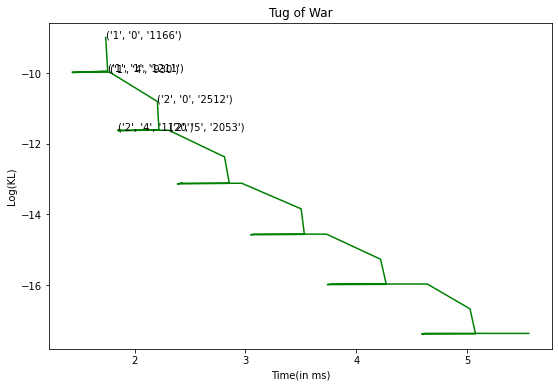

In [130]:
y = [math.log(sum(rel_entr([0.5, 0.5], [float(j.split(',')[2]), 1 - float(j.split(',')[2])]))) for j in acc]
x = [math.log(float(j.split('(')[1][:-4])) for j in runtime]


tic = [(j.split(',')[0], j.split(',')[1], j.split(',')[3][:-1]) for j in bdd]

fig1, ax1 = plt.subplots()

ax1.plot(x, y, color= "green")
ax1.set_ylabel('Log(KL)')
ax1.set_xlabel('Time(in ms)')
ax1.set_title("Tug of War")
for i in [0, 1, 4, 5, 9, 10]:
    ax1.annotate(tic[i], (x[i], y[i]))
fig1.set_facecolor('white')
fig1.set_size_inches(9, 6)

<ipython-input-131-6ff49ab47dd6>:14: RuntimeWarning: invalid value encountered in double_scalars
  y = [math.log(sum(rel_entr([0.5, 0.5], [float(j.split(' ')[1]), 1 - float(j.split(' ')[1])]))) for j in mcmc]


7


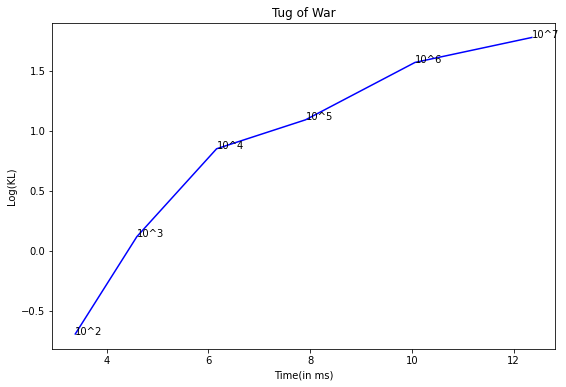

In [131]:
c = open("/home/poorvagarg/.julia/dev/Dice/tow_mcmc.txt", "r")
mcmc = c.readlines()
# mcmc = mcmc]

fig1, ax1 = plt.subplots()

ax1.set_ylabel('Log(KL)')
ax1.set_xlabel('Time(in ms)')
ax1.set_title("Tug of War")

fig1.set_facecolor('white')
fig1.set_size_inches(9, 6)

y = [math.log(sum(rel_entr([0.5, 0.5], [float(j.split(' ')[1]), 1 - float(j.split(' ')[1])]))) for j in mcmc]
x = [math.log(float(j.split(' ')[0])) for j in mcmc]

print(len(x))

t = [str(10) + "^" + str(i) for i in range(1, 8)]

ax1.plot(x, y, color= "blue")
for i in range(len(t)):
    ax1.annotate(t[i], (x[i], y[i]))



[5.499215308914927, 7.113142108707088, 9.345439285397797, 11.58042989594566, 13.830672532106103, 16.18252554119577, 18.498661644484688]


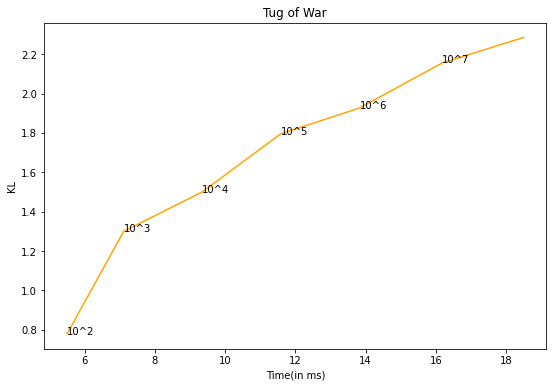

In [132]:
d = open("/home/poorvagarg/.julia/dev/Dice/tow_rej.txt", "r")
rej = d.readlines()
rej = rej[1:]

fig1, ax1 = plt.subplots()

ax1.set_ylabel('KL')
ax1.set_xlabel('Time(in ms)')
ax1.set_title("Tug of War")

fig1.set_facecolor('white')
fig1.set_size_inches(9, 6)

y = [math.log(sum(rel_entr([0.5, 0.5], [float(j.split(' ')[1]), 1 - float(j.split(' ')[1])]))) for j in rej]
x = [math.log(float(j.split(' ')[0])) for j in rej]

print(x)

t = [str(10) + "^" + str(i) for i in range(2, 8)]

ax1.plot(x, y, color= "orange")
for i in range(len(t)):
    ax1.annotate(t[i], (x[i], y[i]))

['22.0 inf nan\n', '29.5 0.10263197561265668 0.4387307114576635\n', '99.0 0.027082416365937674 0.11245187152444017\n', '474.0 0.0023216302393432656 0.005076798885775345\n', '2724.5 0.0006442101020790987 0.0012488747462098986\n', '23394.0 1.658048924769442e-05 4.331232563473445e-05\n', '232246.5 1.7886810419223643e-06 7.16560508941726e-06']
7
[244.5, 1228.0, 11446.5, 106983.5, 1015277.5, 10665508.0, 108110201.0]


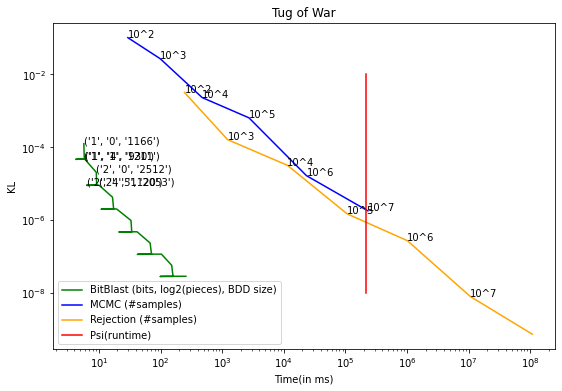

In [133]:
y = [(sum(rel_entr([0.5, 0.5], [float(j.split(',')[2]), 1 - float(j.split(',')[2])]))) for j in acc]
x = [(float(j.split('(')[1][:-4])) for j in runtime]


tic = [(j.split(',')[0], j.split(',')[1], j.split(',')[3][:-1]) for j in bdd]

fig1, ax1 = plt.subplots()

ax1.plot(x, y, color= "green")
ax1.set_ylabel('KL')
ax1.set_xlabel('Time(in ms)')
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_title("Tug of War")
for i in [0, 1, 4, 5, 9, 10]:
    ax1.annotate(tic[i], (x[i], y[i]))
fig1.set_facecolor('white')
fig1.set_size_inches(9, 6)

print(mcmc)
y = [(float(j.split(' ')[1])) for j in mcmc]
x = [(float(j.split(' ')[0])) for j in mcmc]

print(len(x))

t = [str(10) + "^" + str(i) for i in range(1, 8)]

ax1.plot(x, y, color= "blue")
for i in range(len(t)):
    ax1.annotate(t[i], (x[i], y[i]))

y = [(float(j.split(' ')[1])) for j in rej]
x = [(float(j.split(' ')[0])) for j in rej]

print(x)

t = [str(10) + "^" + str(i) for i in range(2, 8)]

ax1.plot(x, y, color= "orange")
for i in range(len(t)):
    ax1.annotate(t[i], (x[i], y[i]))

ax1.plot([213305.5, (213305.5)], [10**(-2), 10**(-8)], color="red")

ax1.legend(["BitBlast (bits, log2(pieces), BDD size)", "MCMC (#samples)", "Rejection (#samples)", "Psi(runtime)"])

fig1.savefig("tow.png")

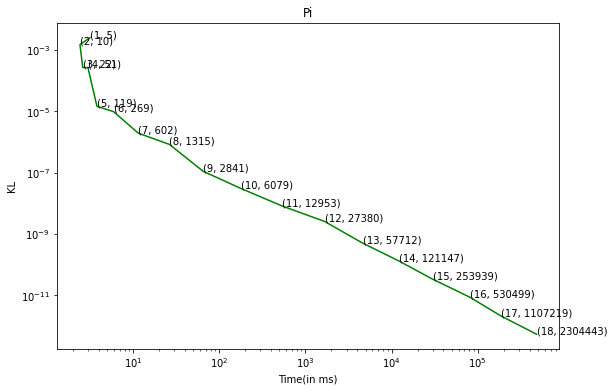

In [134]:
a = open("/home/poorvagarg/.julia/dev/Dice/pi_results.txt", "r")
pi_julia_acc = a.readlines()
# pi_julia_acc = pi_julia_acc[0:15]

# pi_julia_accuracy = readdlm("/home/poorvagarg/.julia/dev/Dice/pi_results.txt", ',', Float64, '\n')
pi_julia_bdd = [5, 10, 22, 51
, 119
, 269
,602
,1315
,2841
,6079
,12953
,27380
,57712
,121147
,253939
,530499
,1107219
,2304443]


t = [i for i in range(1, 19)]
pi_kld = [(float(j.split(',')[2])) for j in pi_julia_acc]
pi_time = [(float(j.split(',')[3])) for j in pi_julia_acc]
tic = [(t[i], pi_julia_bdd[i]) for i in range(0, 18)]

fig1, ax1 = plt.subplots()

ax1.plot(pi_time, pi_kld, color= "green")
ax1.set_ylabel('KL')
ax1.set_xscale("log")
ax1.set_xlabel('Time(in ms)')
ax1.set_yscale("log")
ax1.set_title("Pi")
for i in range(len(tic)):
    ax1.annotate(tic[i], (pi_time[i], pi_kld[i]))

fig1.set_facecolor('white')
fig1.set_size_inches(9, 6)



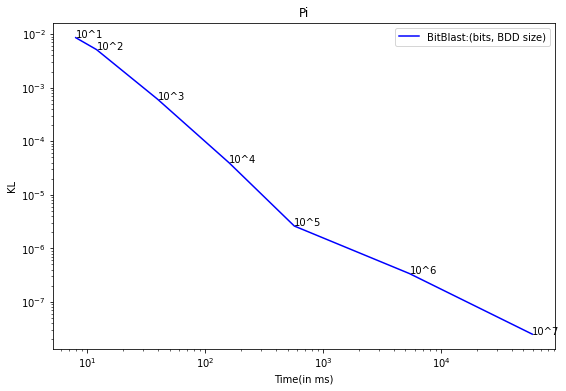

In [135]:
a = open("/home/poorvagarg/.julia/dev/Dice/pi_sample.txt", "r")
pi_acc = a.readlines()

fig1, ax1 = plt.subplots()
ax1.set_ylabel('KL')
ax1.set_xscale("log")
ax1.set_xlabel('Time(in ms)')
ax1.set_yscale("log")
ax1.set_title("Pi")

fig1.set_facecolor('white')
fig1.set_size_inches(9, 6)


t = [str(10) + "^" + str(i) for i in range(1, 8)]
pi_kld = [float(j.split(' ')[1]) for j in pi_acc]
pi_time = [float(j.split(' ')[0]) for j in pi_acc]
# tic = [(t[i], pi_julia_bdd[i]) for i in range(0, 18)]

ax1.plot(pi_time, pi_kld, color= "blue")
ax1.legend(["BitBlast:(bits, BDD size)", "Sampling"])

for i in range(len(t)):
    ax1.annotate(t[i], (pi_time[i], pi_kld[i]))
fig1.savefig("pi.png")

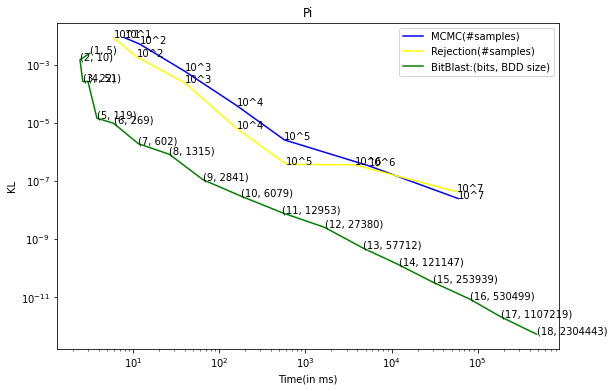

In [136]:
a = open("/home/poorvagarg/.julia/dev/Dice/pi_sample.txt", "r")
pi_acc = a.readlines()

fig1, ax1 = plt.subplots()
ax1.set_ylabel('KL')
ax1.set_xscale("log")
ax1.set_xlabel('Time(in ms)')
ax1.set_yscale("log")
ax1.set_title("Pi")

fig1.set_facecolor('white')
fig1.set_size_inches(9, 6)


t = [str(10) + "^" + str(i) for i in range(1, 8)]
pi_kld = [float(j.split(' ')[1]) for j in pi_acc]
pi_time = [float(j.split(' ')[0]) for j in pi_acc]
# tic = [(t[i], pi_julia_bdd[i]) for i in range(0, 18)]

ax1.plot(pi_time, pi_kld, color= "blue")

for i in range(len(t)):
    ax1.annotate(t[i], (pi_time[i], pi_kld[i]))

a = open("/home/poorvagarg/.julia/dev/Dice/pi_rejection.txt", "r")
pi_acc = a.readlines()

t = [str(10) + "^" + str(i) for i in range(1, 8)]
pi_kld = [float(j.split(' ')[1]) for j in pi_acc]
pi_time = [float(j.split(' ')[0]) for j in pi_acc]

ax1.plot(pi_time, pi_kld, color= "yellow")
# ax1.legend(["BitBlast:(bits, BDD size)", "Sampling"])

for i in range(len(t)):
    ax1.annotate(t[i], (pi_time[i], pi_kld[i]))

a = open("/home/poorvagarg/.julia/dev/Dice/pi_results.txt", "r")
pi_julia_acc = a.readlines()
# pi_julia_acc = pi_julia_acc[0:15]

# pi_julia_accuracy = readdlm("/home/poorvagarg/.julia/dev/Dice/pi_results.txt", ',', Float64, '\n')
pi_julia_bdd = [5, 10, 22, 51
, 119
, 269
,602
,1315
,2841
,6079
,12953
,27380
,57712
,121147
,253939
,530499
,1107219
,2304443]


t = [i for i in range(1, 19)]
pi_kld = [(float(j.split(',')[2])) for j in pi_julia_acc]
pi_time = [(float(j.split(',')[3])) for j in pi_julia_acc]
tic = [(t[i], pi_julia_bdd[i]) for i in range(0, 18)]
ax1.plot(pi_time, pi_kld, color= "green")
for i in range(len(tic)):
    ax1.annotate(tic[i], (pi_time[i], pi_kld[i]))

ax1.legend(["MCMC(#samples)", "Rejection(#samples)", "BitBlast:(bits, BDD size)"])
fig1.savefig("pi.png")

['0.0', '1', '0', '27', '53', '0.16658619011506628', 'TrialEstimate(3.603 ms)\n', '3.603']
['0.0,1,1,19,38,0.6094160643256045,TrialEstimate(2.913 ms)\n,2.913', '0.0,2,2,21,41,0.6114580225852986,TrialEstimate(3.768 ms)\n,3.768', '0.0,3,1,27,50,0.6115084233728768,TrialEstimate(3.495 ms)\n,3.495', '0.0,4,0,33,59,0.45845272261044445,TrialEstimate(3.716 ms)\n,3.716', '0.0,5,0,51,93,0.5240342806796747,TrialEstimate(3.394 ms)\n,3.394', '0.0,6,0,41,71,0.5644034958080438,TrialEstimate(4.051 ms)\n,4.051', '0.0,7,1,43,74,0.6115107913645371,TrialEstimate(4.596 ms)\n,4.596', '0.0,8,0,69,123,0.5989237701888831,TrialEstimate(4.443 ms)\n,4.443', '0.0,9,0,53,89,0.6052484883884656,TrialEstimate(4.042 ms)\n,4.042', '0.0,10,0,81,143,0.6051967376113362,TrialEstimate(4.622 ms)\n,4.622', '0.0,11,0,87,153,0.6083373812277869,TrialEstimate(4.747 ms)\n,4.747', '0.0,12,0,93,163,0.6099199585164732,TrialEstimate(4.595 ms)\n,4.595', '0.0,13,1,67,110,0.6115107913669062,TrialEstimate(5.444 ms)\n,5.444', '0.0,14,0,105,

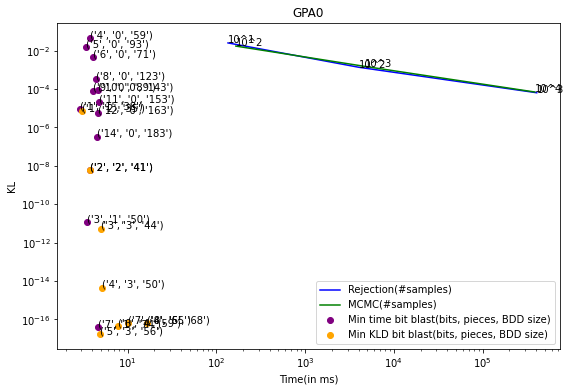

In [137]:
a = open("/home/poorvagarg/.julia/dev/Dice/benchmarks/gpa_rej_0.txt", "r")
rej = a.readlines()

fig1, ax1 = plt.subplots()
ax1.set_ylabel('KL')
ax1.set_xscale("log")
ax1.set_xlabel('Time(in ms)')
ax1.set_yscale("log")
ax1.set_title("GPA0")

fig1.set_facecolor('white')
fig1.set_size_inches(9, 6)


t = ['10^1', '10^2', '10^3']
kld = [float(j.split(' ')[1]) for j in rej]
time = [float(j.split(' ')[0]) for j in rej]
# tic = [(t[i], pi_julia_bdd[i]) for i in range(0, 18)]

ax1.plot(time, kld, color= "blue")

for i in range(len(t)):
    ax1.annotate(t[i], (time[i], kld[i]))


a = open("/home/poorvagarg/.julia/dev/Dice/benchmarks/gpa_mcmc_0.txt", "r")
mcmc = a.readlines()


t = ['10^2', '10^3', '10^4']
kld = [float(j.split(' ')[2]) for j in mcmc]
time = [float(j.split(' ')[1]) for j in mcmc]
# tic = [(t[i], pi_julia_bdd[i]) for i in range(0, 18)]

ax1.plot(time, kld, color= "green")

for i in range(len(t)):
    ax1.annotate(t[i], (time[i], kld[i]))

a = open("/home/poorvagarg/.julia/dev/Dice/benchmarks/gpa_res.txt", "r")
dice = a.readlines()
dice = [j for j in dice if j.split(',')[0] == '0.0']
for j in range(len(dice)):
    temp = dice[j].split(',')
    temp2 = temp[-1].split(' ')
    if temp2[-1][0] == 'm':
        temp3 = float(temp2[0].split('(')[1])
    else:
        temp3 = float(temp2[0].split('(')[1]) * 1000
    
    dice[j] = dice[j] + ',' + str(temp3)
print(dice[0].split(','))

dice_min = []
for i in range(1,15):
    min_time = 100000
    min_j = []
    for j in range(len(dice)):
        temp = dice[j].split(',')
        if float(temp[1]) == i:
            if float(temp[-1]) < min_time:
                min_time = float(temp[-1])
                min_j = dice[j]
    dice_min.append(min_j)

print(dice_min)

dice_max = []
for i in range(1,15):
    max_time = 0.00
    max_j = []
    for j in range(len(dice)):
        temp = dice[j].split(',')
        if float(temp[1]) == i:
            if float(temp[5]) > max_time:
                max_time = float(temp[5])
                max_j = dice[j]

    dice_max.append(max_j)

print(dice_max)



    

prob = [0.6115107913669062, 1 - 0.6115107913669062]
t = [(j.split(',')[1], j.split(',')[2], j.split(',')[4]) for j in dice_min]
kld = [sum(rel_entr(prob, [float(j.split(',')[5]), 1 - float(j.split(',')[5])])) for j in dice_min]
time = [float(j.split(',')[7]) for j in dice_min]

ax1.scatter(time, kld, color= "purple")

for i in range(len(t)):
    ax1.annotate(t[i], (time[i], kld[i]))

dice_min = dice_max
prob = [0.6115107913669062, 1 - 0.6115107913669062]
t = [(j.split(',')[1], j.split(',')[2], j.split(',')[4]) for j in dice_min]
kld = [sum(rel_entr(prob, [float(j.split(',')[5]), 1 - float(j.split(',')[5])])) for j in dice_min]
time = [float(j.split(',')[7]) for j in dice_min]

ax1.scatter(time, kld, color= "orange")

for i in range(len(t)):
    ax1.annotate(t[i], (time[i], kld[i]))

ax1.legend(["Rejection(#samples)", "MCMC(#samples)", "Min time bit blast(bits, pieces, BDD size)", "Min KLD bit blast(bits, pieces, BDD size)"])
fig1.savefig("gpa0.png")

[75.5, 213.0, 5843.5, 572454.5] [1e-05, 1e-05, 1e-05, 1e-05]
['4.0', '1', '0', '17', '23', '0.03883495145631074', 'TrialEstimate(4.883 ms)\n', '4.883']
['4.0,1,1,16,22,0.01981448648395271,TrialEstimate(2.608 ms)\n,2.608', '4.0,2,0,21,27,0.07476635514018704,TrialEstimate(2.683 ms)\n,2.683', '4.0,3,0,25,31,0.13913043478260897,TrialEstimate(2.720 ms)\n,2.72', '4.0,4,0,26,32,0.24427480915337976,TrialEstimate(2.768 ms)\n,2.768', '4.0,5,0,33,39,0.3926380369687647,TrialEstimate(2.929 ms)\n,2.929', '4.0,6,0,32,38,0.5638766484288876,TrialEstimate(2.960 ms)\n,2.96', '4.0,7,0,35,41,0.7211267334555951,TrialEstimate(3.017 ms)\n,3.017', '4.0,8,0,45,51,0.8379710167464491,TrialEstimate(3.230 ms)\n,3.23', '4.0,9,0,41,47,0.9118431143816516,TrialEstimate(3.267 ms)\n,3.267', '4.0,10,0,53,59,0.9538945175525642,TrialEstimate(3.497 ms)\n,3.497', '4.0,11,0,57,63,0.9764018832537384,TrialEstimate(3.653 ms)\n,3.653', '4.0,12,0,61,67,0.9880597015145128,TrialEstimate(3.805 ms)\n,3.805']
['4.0,1,0,17,23,0.038834951

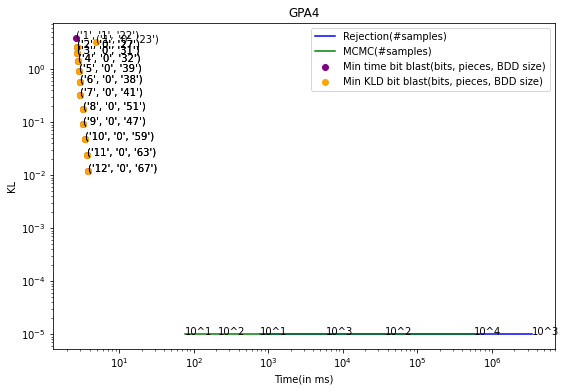

In [138]:
a = open("/home/poorvagarg/.julia/dev/Dice/benchmarks/gpa_rej_4.txt", "r")
rej = a.readlines()

fig1, ax1 = plt.subplots()
ax1.set_ylabel('KL')
ax1.set_xscale("log")
ax1.set_xlabel('Time(in ms)')
ax1.set_yscale("log")
ax1.set_title("GPA4")

fig1.set_facecolor('white')
fig1.set_size_inches(9, 6)


t = ['10^1', '10^2', '10^3']
kld = [float(j.split(' ')[1]) for j in rej]
kld = margin(kld)
time = [float(j.split(' ')[0]) for j in rej]
# tic = [(t[i], pi_julia_bdd[i]) for i in range(0, 18)]


ax1.plot(time, kld, color= "blue")

for i in range(len(t)):
    ax1.annotate(t[i], (time[i], kld[i]))


a = open("/home/poorvagarg/.julia/dev/Dice/benchmarks/gpa_mcmc_4.txt", "r")
mcmc = a.readlines()


t = ['10^1','10^2', '10^3', '10^4']
kld = [float(j.split(' ')[1]) for j in mcmc]
kld = margin(kld)
time = [float(j.split(' ')[0]) for j in mcmc]
# tic = [(t[i], pi_julia_bdd[i]) for i in range(0, 18)]
print(time, kld)
ax1.plot(time, kld, color= "green")

for i in range(len(t)):
    ax1.annotate(t[i], (time[i], kld[i]))

a = open("/home/poorvagarg/.julia/dev/Dice/benchmarks/gpa_res.txt", "r")
dice = a.readlines()
dice = [j for j in dice if j.split(',')[0] == '4.0']
for j in range(len(dice)):
    temp = dice[j].split(',')
    temp2 = temp[-1].split(' ')
    if temp2[-1][0] == 'm':
        temp3 = float(temp2[0].split('(')[1])
    else:
        temp3 = float(temp2[0].split('(')[1]) * 1000
    
    dice[j] = dice[j] + ',' + str(temp3)
print(dice[0].split(','))

dice_min = []
for i in range(1,13):
    min_time = 100000
    min_j = []
    for j in range(len(dice)):
        temp = dice[j].split(',')
        if float(temp[1]) == i:
            if float(temp[-1]) < min_time:
                min_time = float(temp[-1])
                min_j = dice[j]
    dice_min.append(min_j)

print(dice_min)

dice_max = []
for i in range(1,13):
    max_time = 0.00
    max_j = []
    for j in range(len(dice)):
        temp = dice[j].split(',')
        if float(temp[1]) == i:
            if float(temp[5]) > max_time:
                max_time = float(temp[5])
                max_j = dice[j]

    dice_max.append(max_j)

print(dice_max)



    

prob = [1, 0]
t = [(j.split(',')[1], j.split(',')[2], j.split(',')[4]) for j in dice_min]
kld = [sum(rel_entr(prob, [float(j.split(',')[5]), 1 - float(j.split(',')[5])])) for j in dice_min]
time = [float(j.split(',')[7]) for j in dice_min]

ax1.scatter(time, kld, color= "purple")

for i in range(len(t)):
    ax1.annotate(t[i], (time[i], kld[i]))

dice_min = dice_max
prob = [1, 0]
t = [(j.split(',')[1], j.split(',')[2], j.split(',')[4]) for j in dice_min]
kld = [sum(rel_entr(prob, [float(j.split(',')[5]), 1 - float(j.split(',')[5])])) for j in dice_min]
time = [float(j.split(',')[7]) for j in dice_min]

ax1.scatter(time, kld, color= "orange")

for i in range(len(t)):
    ax1.annotate(t[i], (time[i], kld[i]))

ax1.legend(["Rejection(#samples)", "MCMC(#samples)", "Min time bit blast(bits, pieces, BDD size)", "Min KLD bit blast(bits, pieces, BDD size)"])
fig1.savefig("gpa4.png")

[109.5, 212.0, 2417.0, 177165.0] [1e-05, 1e-05, 1e-05, 1e-05]
['8.0', '1', '0', '3', '6', '0.0', 'TrialEstimate(2.587 ms)\n', '2.587']
['8.0,1,0,3,6,0.0,TrialEstimate(2.587 ms)\n,2.587', '8.0,2,0,3,6,0.0,TrialEstimate(2.662 ms)\n,2.662', '8.0,3,0,3,6,0.0,TrialEstimate(2.736 ms)\n,2.736', '8.0,4,0,3,6,0.0,TrialEstimate(2.783 ms)\n,2.783', '8.0,5,0,3,6,0.0,TrialEstimate(2.921 ms)\n,2.921', '8.0,6,0,3,6,0.0,TrialEstimate(2.946 ms)\n,2.946', '8.0,7,0,3,6,0.0,TrialEstimate(3.029 ms)\n,3.029', '8.0,8,0,3,6,0.0,TrialEstimate(3.222 ms)\n,3.222', '8.0,9,0,3,6,0.0,TrialEstimate(3.221 ms)\n,3.221', '8.0,10,0,3,6,0.0,TrialEstimate(3.444 ms)\n,3.444', '8.0,11,0,3,6,0.0,TrialEstimate(3.585 ms)\n,3.585', '8.0,12,0,3,6,0.0,TrialEstimate(3.697 ms)\n,3.697']
['8.0,1,0,3,6,0.0,TrialEstimate(2.587 ms)\n,2.587', '8.0,2,0,3,6,0.0,TrialEstimate(2.662 ms)\n,2.662', '8.0,3,0,3,6,0.0,TrialEstimate(2.736 ms)\n,2.736', '8.0,4,0,3,6,0.0,TrialEstimate(2.783 ms)\n,2.783', '8.0,5,0,3,6,0.0,TrialEstimate(2.921 ms)\n,2

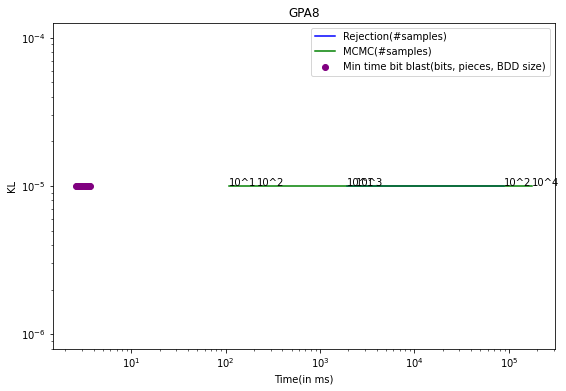

In [139]:
a = open("/home/poorvagarg/.julia/dev/Dice/benchmarks/gpa_rej_8.txt", "r")
rej = a.readlines()

fig1, ax1 = plt.subplots()
ax1.set_ylabel('KL')
ax1.set_xscale("log")
ax1.set_xlabel('Time(in ms)')
ax1.set_yscale("log")
ax1.set_title("GPA8")

fig1.set_facecolor('white')
fig1.set_size_inches(9, 6)


t = ['10^1', '10^2']
kld = [float(j.split(' ')[1]) for j in rej]
kld = margin(kld)
time = [float(j.split(' ')[0]) for j in rej]
# tic = [(t[i], pi_julia_bdd[i]) for i in range(0, 18)]


ax1.plot(time, kld, color= "blue")

for i in range(len(t)):
    ax1.annotate(t[i], (time[i], kld[i]))


a = open("/home/poorvagarg/.julia/dev/Dice/benchmarks/gpa_mcmc_8.txt", "r")
mcmc = a.readlines()


t = ['10^1','10^2', '10^3', '10^4']
kld = [float(j.split(' ')[1]) for j in mcmc]
kld = margin(kld)
time = [float(j.split(' ')[0]) for j in mcmc]
# tic = [(t[i], pi_julia_bdd[i]) for i in range(0, 18)]
print(time, kld)
ax1.plot(time, kld, color= "green")

for i in range(len(t)):
    ax1.annotate(t[i], (time[i], kld[i]))

a = open("/home/poorvagarg/.julia/dev/Dice/benchmarks/gpa_res.txt", "r")
dice = a.readlines()
dice = [j for j in dice if j.split(',')[0] == '8.0']
for j in range(len(dice)):
    temp = dice[j].split(',')
    temp2 = temp[-1].split(' ')
    if temp2[-1][0] == 'm':
        temp3 = float(temp2[0].split('(')[1])
    else:
        temp3 = float(temp2[0].split('(')[1]) * 1000
    
    dice[j] = dice[j] + ',' + str(temp3)
print(dice[0].split(','))

dice_min = []
for i in range(1,13):
    min_time = 100000
    min_j = []
    for j in range(len(dice)):
        temp = dice[j].split(',')
        if float(temp[1]) == i:
            if float(temp[-1]) < min_time:
                min_time = float(temp[-1])
                min_j = dice[j]
    dice_min.append(min_j)

print(dice_min)

dice_max = []
for i in range(1,13):
    max_time = 1.00
    max_j = []
    for j in range(len(dice)):
        temp = dice[j].split(',')
        if float(temp[1]) == i:
            if float(temp[5]) < max_time:
                max_time = float(temp[5])
                max_j = dice[j]

    dice_max.append(max_j)

print(dice_max)



    

prob = [0, 1]
t = [(j.split(',')[1], j.split(',')[2], j.split(',')[4]) for j in dice_min]
kld = [sum(rel_entr(prob, [float(j.split(',')[5]), 1 - float(j.split(',')[5])])) for j in dice_min]
time = [float(j.split(',')[7]) for j in dice_min]
kld= margin(kld)
ax1.scatter(time, kld, color= "purple")

# for i in range(len(t)):
#     ax1.annotate(t[i], (time[i], kld[i]))

# dice_min = dice_max
# prob = [0, 1]
# t = [(j.split(',')[1], j.split(',')[2], j.split(',')[4]) for j in dice_min]
# kld = [sum(rel_entr(prob, [float(j.split(',')[5]), 1 - float(j.split(',')[5])])) for j in dice_min]
# time = [float(j.split(',')[7]) for j in dice_min]
# kld = margin(kld)
# ax1.scatter(time, kld, color= "orange")

# for i in range(len(t)):
#     ax1.annotate(t[i], (time[i], kld[i]))

ax1.legend(["Rejection(#samples)", "MCMC(#samples)", "Min time bit blast(bits, pieces, BDD size)", "Min KLD bit blast(bits, pieces, BDD size)"])

fig1.savefig("gpa8.png")

Radar Query 1 (Uniform + Gaussian)

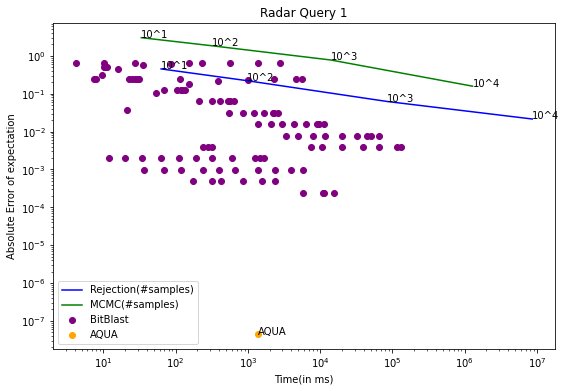

In [8]:
AQUA_mean, AQUA_variance = read_AQUA_file("/home/poorvagarg/Desktop/AQUA/benchmarks/storm_bench/radar_query2/analysis_x2.txt")
gt_mean, gt_variance = 14, 64/12 + 1.414**2
 
a = open("/home/poorvagarg/.julia/dev/Dice/benchmarks/rq1_rej.txt", "r")
rej = a.readlines()

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Absolute Error of expectation')
ax1.set_xscale("log")
ax1.set_xlabel('Time(in ms)')
ax1.set_yscale("log")
ax1.set_title("Radar Query 1")

fig1.set_facecolor('white')
fig1.set_size_inches(9, 6)


t = ['10^1', '10^2', '10^3', '10^4']
kld = [float(j.split(' ')[1]) for j in rej]
time = [float(j.split(' ')[0]) for j in rej]
# tic = [(t[i], pi_julia_bdd[i]) for i in range(0, 18)]


ax1.plot(time, kld, color= "blue")

for i in range(len(t)):
    ax1.annotate(t[i], (time[i], kld[i]))


a = open("/home/poorvagarg/.julia/dev/Dice/benchmarks/rq1_mcmc.txt", "r")
mcmc = a.readlines()


t = ['10^1','10^2', '10^3', '10^4']
kld = [float(j.split(' ')[1]) for j in mcmc]
# kld = margin(kld)
time = [float(j.split(' ')[0]) for j in mcmc]
# tic = [(t[i], pi_julia_bdd[i]) for i in range(0, 18)]
# print(time, kld)
ax1.plot(time, kld, color= "green")

for i in range(len(t)):
    ax1.annotate(t[i], (time[i], kld[i]))

a = open("/home/poorvagarg/.julia/dev/Dice/benchmarks/rq1_res.txt", "r")
dice = a.readlines()
dice = [j for j in dice]

t = []
abs_err = []
time = []
for j in range(len(dice)):
    # print(temp[6])
    temp = dice[j].split(',')
    t.append((temp[0], temp[1], temp[3]))
    abs_err.append(abs(float(temp[6].split('(')[-1]) - 14))
    time.append(temp[4].split('(')[-1])

# print(time)

for k in range(len(time)):
    if time[k][-3:] == 'ms)':
        time[k] = float(time[k].split(' ')[0])
    elif time[k][-2:] == 's)':
        time[k] = float(time[k].split(' ')[0]) * 1000
    else:
        time[k] = float(time[k])


ax1.scatter(time, abs_err, color= "purple")

AQUA_pt = [1368.760479, abs(gt_mean - AQUA_mean)]
ax1.scatter(AQUA_pt[0], AQUA_pt[1], color = 'orange')

ax1.annotate('AQUA', AQUA_pt)

ax1.legend(["Rejection(#samples)", "MCMC(#samples)", "BitBlast", "AQUA"])

fig1.savefig("rq1_results.png")


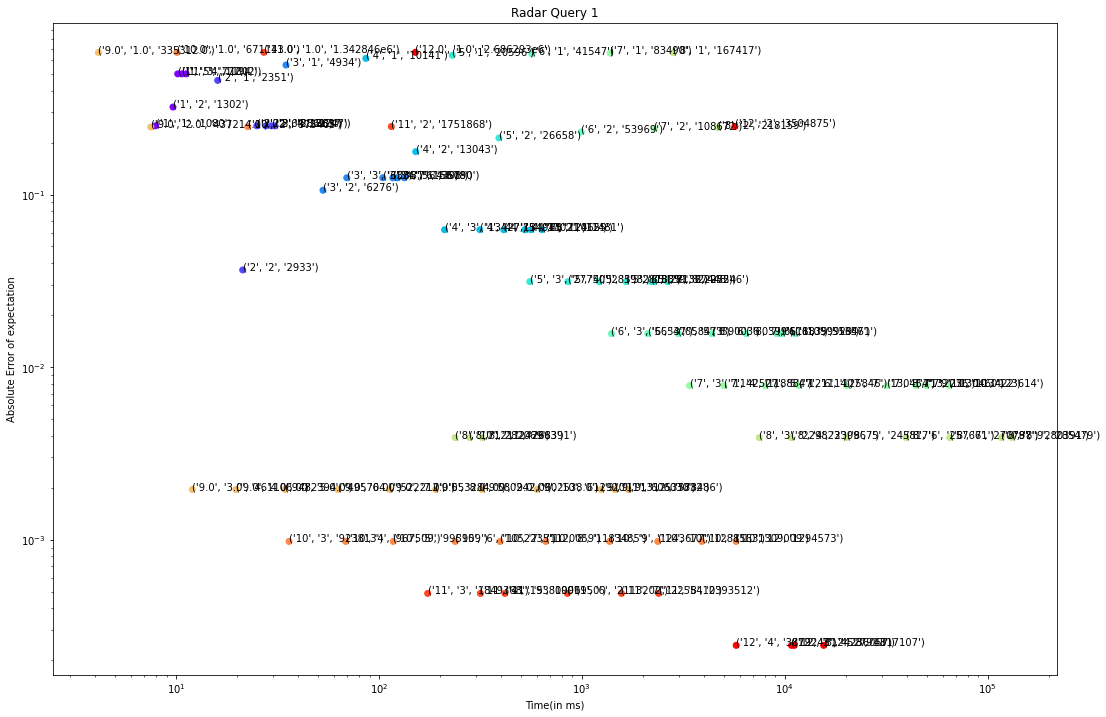

In [66]:
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Absolute Error of expectation')
ax1.set_xscale("log")
ax1.set_xlabel('Time(in ms)')
ax1.set_yscale("log")
ax1.set_title("Radar Query 1")

fig1.set_facecolor('white')
fig1.set_size_inches(18, 12)

a = open("/home/poorvagarg/.julia/dev/Dice/benchmarks/rq1_res.txt", "r")
dice = a.readlines()
dice = [j for j in dice]

t = []
abs_err = []
time = []
bits = []
for j in range(len(dice)):
    # print(temp[6])
    temp = dice[j].split(',')
    # if float(temp[0]) == 5:
    t.append((temp[0], temp[1], temp[3]))
    bits.append(float(temp[0]))
    abs_err.append(abs(float(temp[6].split('(')[-1]) - 14))
    time.append(temp[4].split('(')[-1])

# print(time)

for k in range(len(time)):
    if time[k][-3:] == 'ms)':
        time[k] = float(time[k].split(' ')[0])
    elif time[k][-2:] == 's)':
        time[k] = float(time[k].split(' ')[0]) * 1000
    else:
        time[k] = float(time[k])


In [87]:
def plot_indiv(no, fig1, ax1):
    # fig1, ax1 = plt.subplots()
    ax1.set_ylabel('Absolute Error of expectation')
    ax1.set_xscale("log")
    ax1.set_xlabel('Time(in ms)')
    ax1.set_yscale("log")
    ax1.set_title("Radar Query 1" + str(no))

    fig1.set_facecolor('white')
    fig1.set_size_inches(18, 12)

    t = []
    abs_err = []
    time = []
    bits = []
    for j in range(len(dice)):
        # print(temp[6])
        temp = dice[j].split(',')
        if float(temp[0]) == no:
            t.append((temp[0], temp[1], temp[3]))
            bits.append(float(temp[0]))
            abs_err.append(abs(float(temp[6].split('(')[-1]) - 14))
            time.append(temp[4].split('(')[-1])

    # print(t)
    # print(bits)
    # print(abs_err)
    # print(time)

    for k in range(len(time)):
        if time[k][-3:] == 'ms)':
            time[k] = float(time[k].split(' ')[0])
        elif time[k][-2:] == 's)':
            time[k] = float(time[k].split(' ')[0]) * 1000
        else:
            time[k] = float(time[k]) * 1000

    ax1.plot(time, abs_err, color="purple")

    for i in range(len(t)):
        ax1.annotate(t[i], (time[i], abs_err[i]))

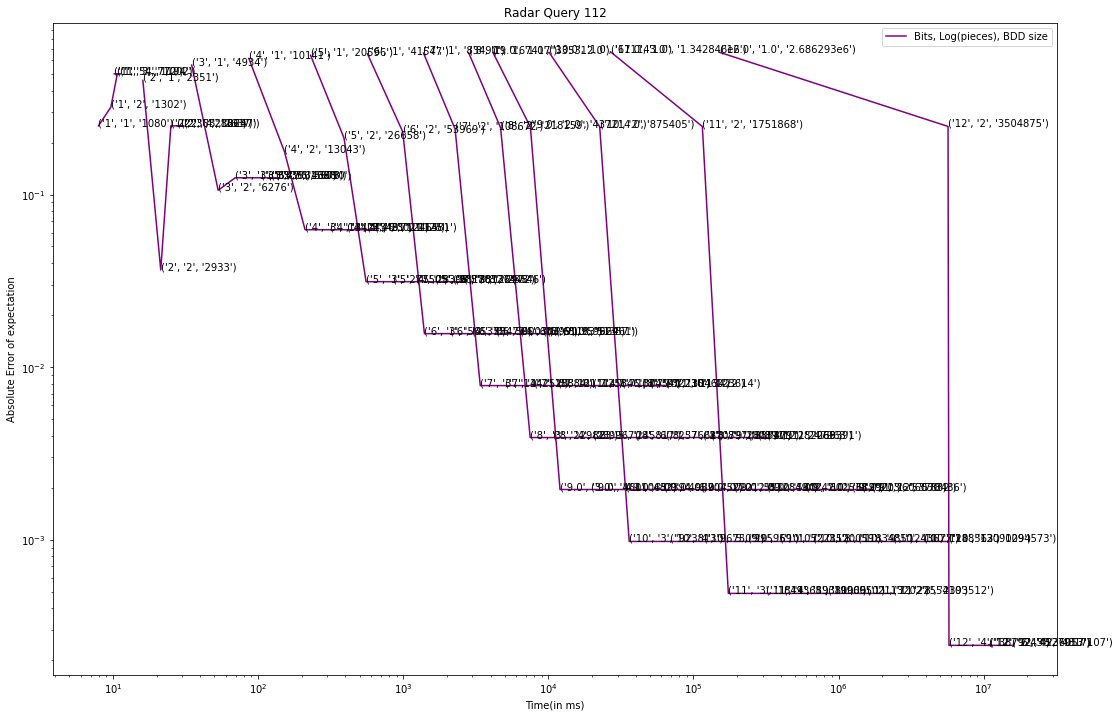

In [90]:
fig, ax = plt.subplots()

plot_indiv(1, fig, ax)
plot_indiv(2, fig, ax)
plot_indiv(3, fig, ax)
plot_indiv(4, fig, ax)
plot_indiv(5, fig, ax)
plot_indiv(6, fig, ax)
plot_indiv(7, fig, ax)
plot_indiv(8, fig, ax)
plot_indiv(9, fig, ax)
plot_indiv(10, fig, ax)
plot_indiv(11, fig, ax)
plot_indiv(12, fig, ax)

fig.savefig("rq1.png")
ax.legend(["Bits, Log(pieces), BDD size"])

[('8', '1', '167417'), ('8', '2', '218159'), ('8', '3', '229823'), ('8', '4', '239967'), ('8', '5', '245817'), ('8', '6', '257661'), ('8', '7', '270797'), ('8', '8', '280391'), ('8', '9', '285479'), ('8', '10', '282069'), ('8', '11', '268391'), ('8', '12', '247963')]
[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0]
[0.6634989900084847, 0.2438280502412873, 0.0039062499913455895, 0.0039062499918678384, 0.003906249992114752, 0.0039062499922017935, 0.003906249992219557, 0.003906249992219557, 0.003906249992219557, 0.003906249992219557, 0.003906249992219557, 0.003906249992219557]
['2.822 s)', '4.687 s)', '7.499 s)', '10.751 s)', '20.173 s)', '39.624 s)', '65.037 s)', '116.767 s)', '131.186 s)', '237.381634367', '321.74673698', '279.57804314']


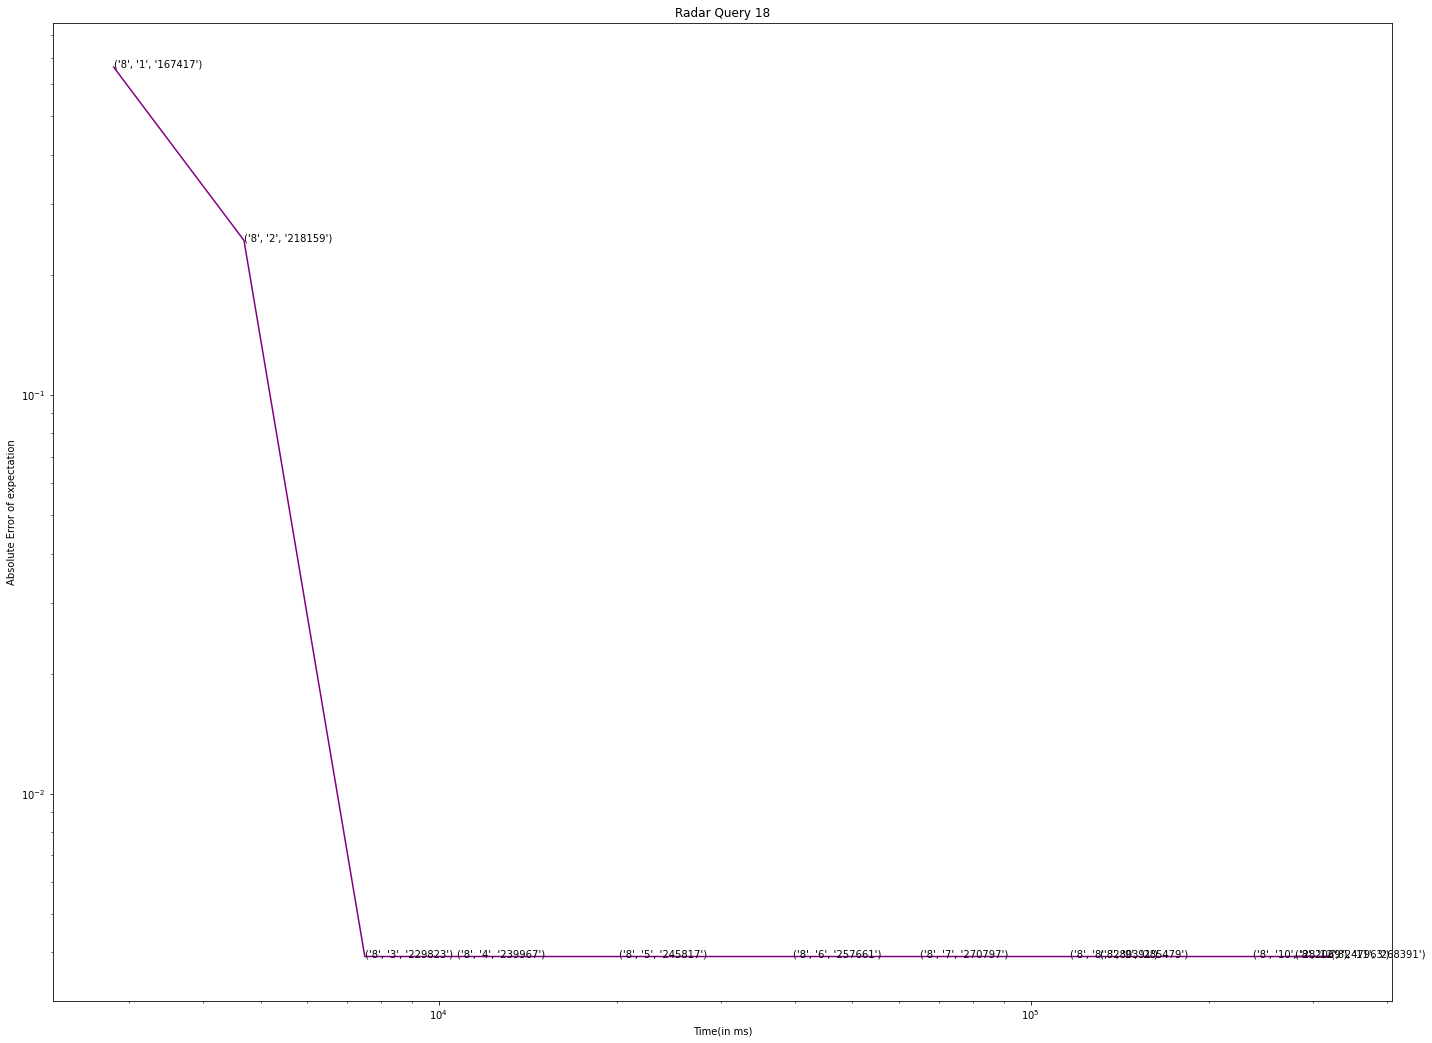

In [76]:
fig, ax = plt.subplots()
plot_indiv(8, fig, ax)


# fig.savefig("rq1.png")

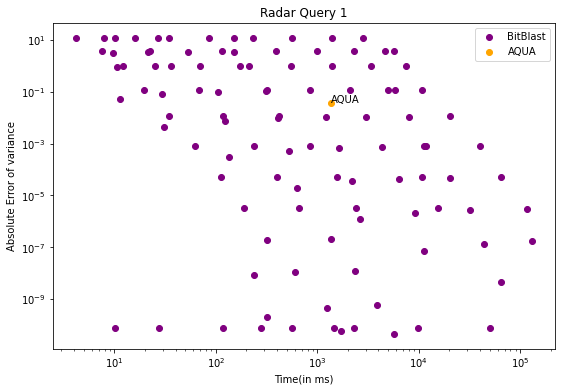

In [97]:
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Absolute Error of variance')
ax1.set_xscale("log")
ax1.set_xlabel('Time(in ms)')
ax1.set_yscale("log")
ax1.set_title("Radar Query 1")

fig1.set_facecolor('white')
fig1.set_size_inches(9, 6)

a = open("/home/poorvagarg/.julia/dev/Dice/benchmarks/rq1_res.txt", "r")
dice = a.readlines()
dice = [j for j in dice]

t = []
abs_err = []
time = []
for j in range(len(dice)):
    temp = dice[j].split(',')
    t.append((temp[0], temp[1], temp[3]))
    abs_err.append(abs(float(temp[-1]) - 7.332729333333333))
    time.append(temp[4].split('(')[-1])

for k in range(len(time)):
    if time[k][-3:] == 'ms)':
        time[k] = float(time[k].split(' ')[0])
    elif time[k][-2:] == 's)':
        time[k] = float(time[k].split(' ')[0]) * 1000
    else:
        time[k] = float(time[k])

ax1.scatter(time, abs_err, color= "purple")

ax1.scatter([1368.760479], [0.03703752064430432], color = 'orange')
ax1.annotate('AQUA', (1368.760479, 0.03703752064430432))

ax1.legend(["BitBlast", "AQUA"])

# fig1.legend("")
fig1.savefig("rq1_results.png")

In [98]:
def plot_indiv_variance(no, fig1, ax1):
    # fig1, ax1 = plt.subplots()
    ax1.set_ylabel('Absolute Error of Variance')
    ax1.set_xscale("log")
    ax1.set_xlabel('Time(in ms)')
    ax1.set_yscale("log")
    ax1.set_title("Radar Query 1" + str(no))

    fig1.set_facecolor('white')
    fig1.set_size_inches(18, 12)

    t = []
    abs_err = []
    time = []
    bits = []
    for j in range(len(dice)):
        # print(temp[6])
        temp = dice[j].split(',')
        if float(temp[0]) == no:
            t.append((temp[0], temp[1], temp[3]))
            bits.append(float(temp[0]))
            abs_err.append(abs(float(temp[-1]) - 7.332729333333333))
            time.append(temp[5].split('(')[-1])

    # print(t)
    # print(bits)
    # print(abs_err)
    # print(time)

    for k in range(len(time)):
        if time[k][-3:] == 'ms)':
            time[k] = float(time[k].split(' ')[0])
        elif time[k][-2:] == 's)':
            time[k] = float(time[k].split(' ')[0]) * 1000
        else:
            time[k] = float(time[k]) * 1000

    ax1.plot(time, abs_err, color="purple")

    for i in range(len(t)):
        ax1.annotate(t[i], (time[i], abs_err[i]))

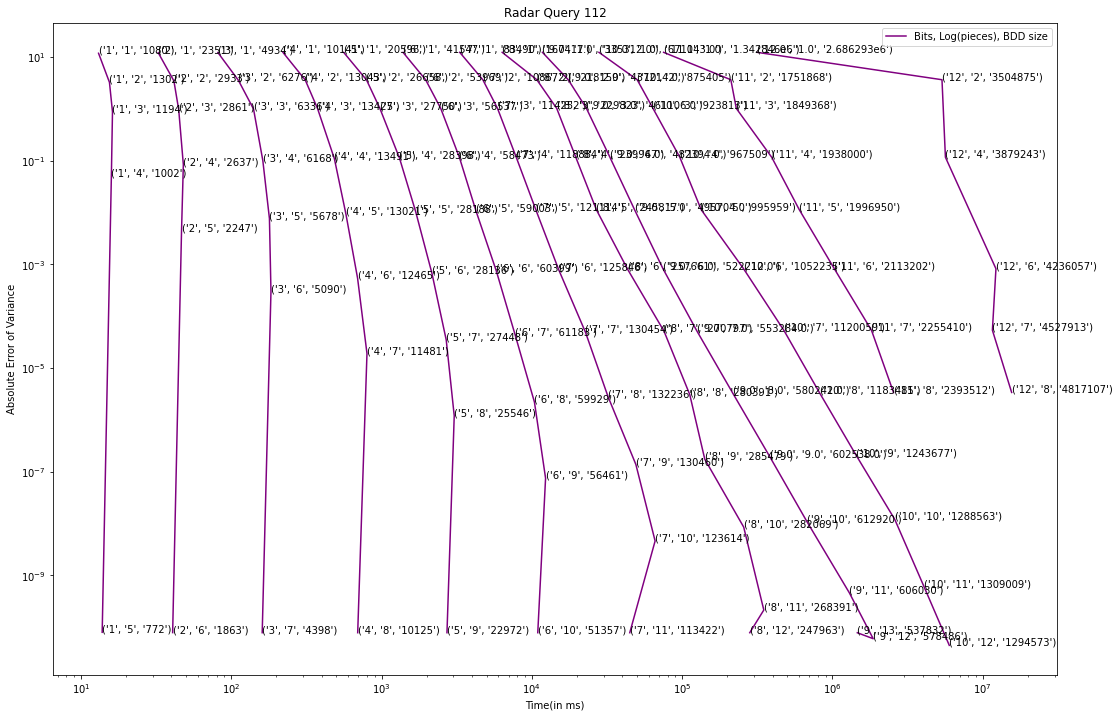

In [99]:
fig, ax = plt.subplots()

for i in range(1, 13):
    plot_indiv_variance(i, fig, ax)

fig.savefig("rq1.png")
ax.legend(["Bits, Log(pieces), BDD size"])

Altermu2    

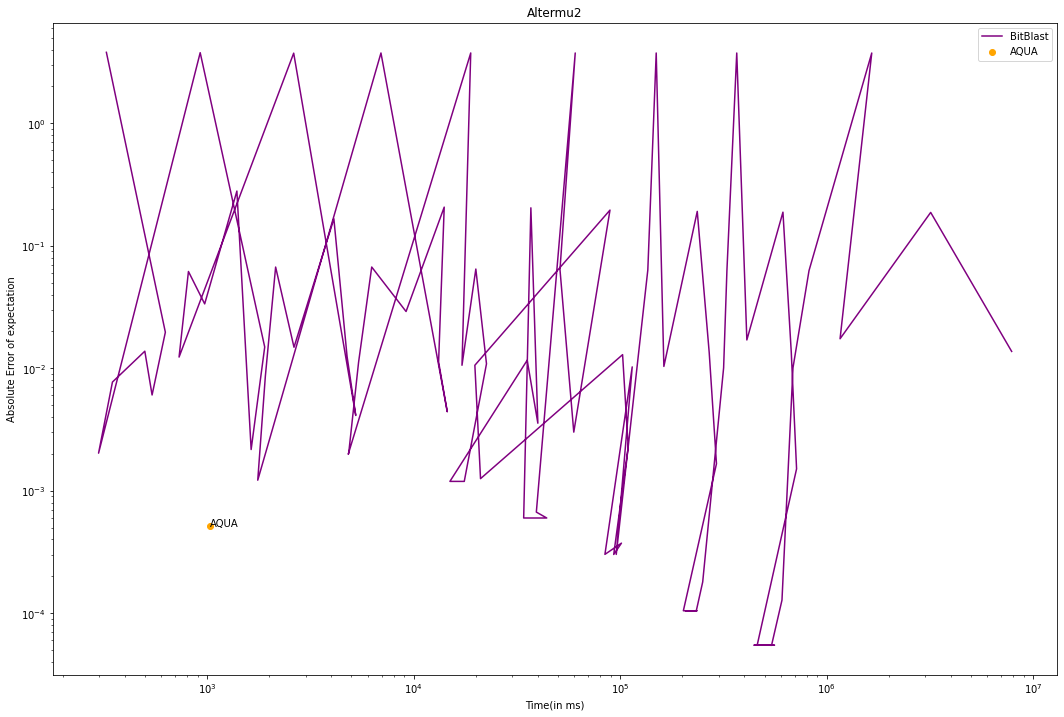

In [27]:
AQUA_time = 1.032172729 * 1000
gt_mean = (1.51251662585150465e-01 + 1.58960572270531064e-01)/2
gt_variance = 4.52785577875832512 ** 2

#TODO: check this
AQUA_mean, AQUA_variance = read_AQUA_file("/home/poorvagarg/Desktop/AQUA/benchmarks/stan_bench/altermu2/analysis_mu[1].txt")

AQUA_mean = 0.1556196223786136
AQUA_variance = 20.304334302261715



fig1, ax1 = plt.subplots()
ax1.set_ylabel('Absolute Error of expectation')
ax1.set_xscale("log")
ax1.set_xlabel('Time(in ms)')
ax1.set_yscale("log")
ax1.set_title("Altermu2")

fig1.set_facecolor('white')
fig1.set_size_inches(18, 12)

a = open("/home/poorvagarg/.julia/dev/Dice/benchmarks/altermu2_res.txt", "r")
dice = a.readlines()
dice = [j for j in dice]

t = []
abs_err = []
time = []


for j in range(31):
    temp = dice[j].split(',')
    # print(temp)
    t.append((temp[0], temp[1], temp[3]))

    temp2 = abs(float(temp[4].split("(")[-1]) - gt_mean)
    abs_err.append(temp2)

    temp3 = temp[7].split('(')[-1]
    time.append(temp3)

for j in range(31,len(dice)):
    temp = dice[j].split(',')
    # print(temp)
    t.append((temp[0], temp[1], temp[3]))

    temp2 = abs(float(temp[6].split("(")[-1]) - gt_mean)
    abs_err.append(temp2)

    temp3 = temp[4].split('(')[-1]
    time.append(temp3)

# for j in range(len(dice)):
#     temp = dice[j].split(',')
#     t.append((temp[0], temp[1], temp[3]))
#     abs_err.append(abs(float(temp[4].split('(')[0]) - gt_mean))
#     time.append(temp[7].split('(')[-1])

for k in range(len(dice)):
    if time[k][-3:] == 'ms)':
        time[k] = float(time[k].split(' ')[0])
    elif time[k][-2:] == 's)':
        time[k] = float(time[k].split(' ')[0]) * 1000
    else:
        time[k] = float(time[k])*1000

ax1.plot(time, abs_err, color= "purple")

AQUA_pt = (AQUA_time, abs(AQUA_mean - gt_mean))
ax1.scatter(AQUA_pt[0], AQUA_pt[1], color = 'orange')
ax1.annotate('AQUA', AQUA_pt)

ax1.legend(["BitBlast", "AQUA"])

# fig1.legend("")
fig1.savefig("altermu2_results_mean.png")



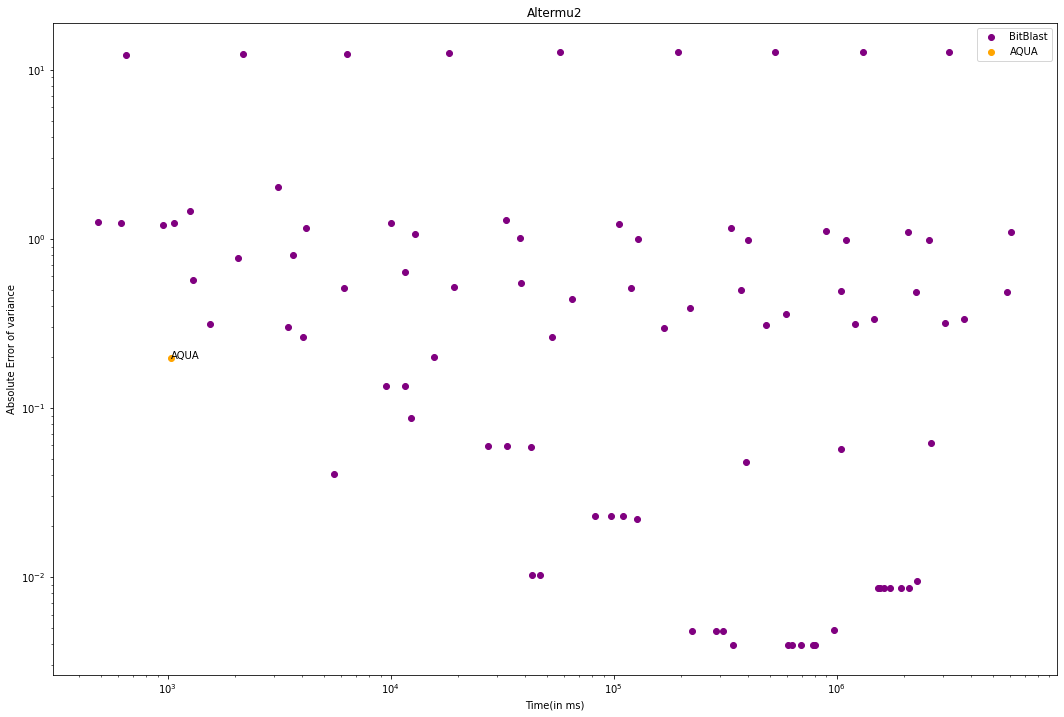

In [28]:
AQUA_time = 1.032172729 * 1000
gt_mean = (1.51251662585150465e-01 + 1.58960572270531064e-01)/2
gt_variance = 4.52785577875832512 ** 2

AQUA_mean = 0.1556196223786136
AQUA_variance = 20.304334302261715



fig1, ax1 = plt.subplots()
ax1.set_ylabel('Absolute Error of variance')
ax1.set_xscale("log")
ax1.set_xlabel('Time(in ms)')
ax1.set_yscale("log")
ax1.set_title("Altermu2")

fig1.set_facecolor('white')
fig1.set_size_inches(18, 12)

a = open("/home/poorvagarg/.julia/dev/Dice/benchmarks/altermu2_res.txt", "r")
dice = a.readlines()
dice = [j for j in dice]

t = []
abs_err = []
time = []


for j in range(31):
    temp = dice[j].split(',')
    # print(temp)
    t.append((temp[0], temp[1], temp[3]))

    temp2 = abs(float(temp[-2].split("(")[-1]) - gt_variance)
    abs_err.append(temp2)

    temp3 = temp[-1].split('(')[-1]
    time.append(temp3)

for j in range(31,len(dice)):
    temp = dice[j].split(',')
    # print(temp)
    t.append((temp[0], temp[1], temp[3]))

    temp2 = abs(float(temp[-1].split("(")[-1]) - gt_variance)
    abs_err.append(temp2)

    temp3 = temp[5].split('(')[-1]
    time.append(temp3)


for k in range(len(dice)):
    if time[k][-4:] == 'ms)\n' :
        time[k] = float(time[k].split(' ')[0])
    elif time[k][-3:] == 's)\n':
        time[k] = float(time[k].split(' ')[0]) * 1000
    else:
        time[k] = float(time[k])*1000

ax1.scatter(time, abs_err, color= "purple")

AQUA_pt = (AQUA_time, abs(AQUA_variance - gt_variance))
ax1.scatter(AQUA_pt[0], AQUA_pt[1], color = 'orange')
ax1.annotate('AQUA', AQUA_pt)

ax1.legend(["BitBlast", "AQUA"])

# fig1.legend("")
fig1.savefig("altermu2_results_variance.png")

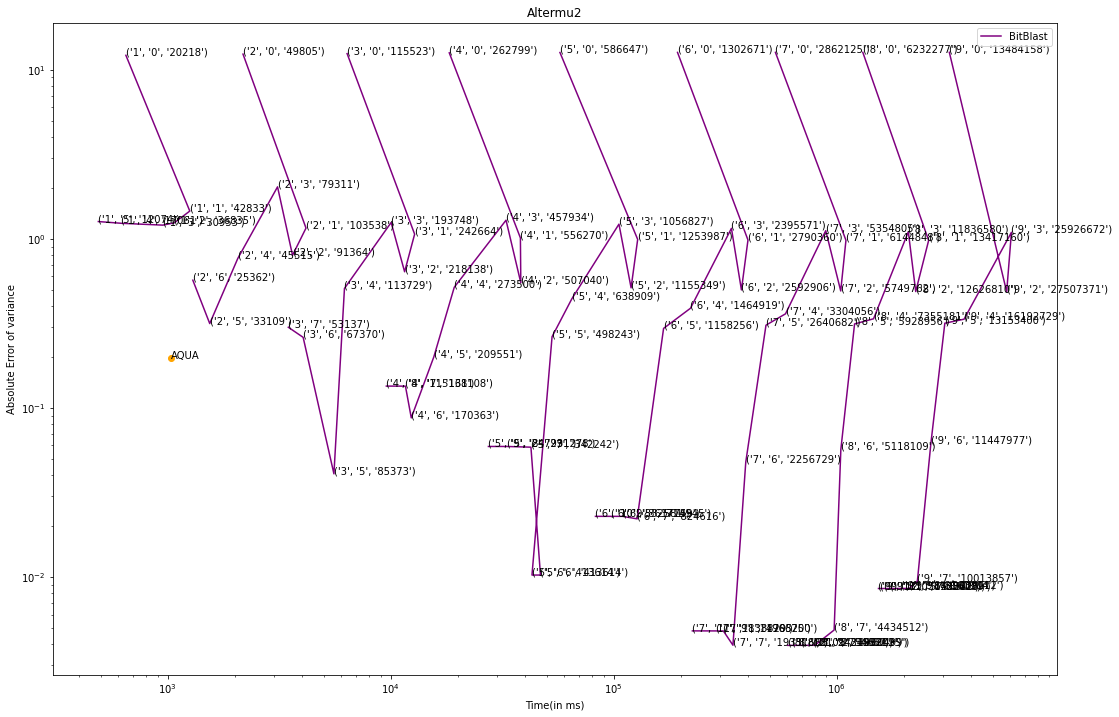

In [29]:


def plot_indiv_variance(file, gt_variance, title, no, fig1, ax1):

    a = open(file, "r")
    dice = a.readlines()

    dice = [(float(j.split(',')[1]), j) for j in dice if float(j.split(',')[0]) == no]
    dice.sort()

    dice = [j[1] for j in dice]

    t = []
    abs_err = []
    time = []


    for j in range(len(dice)):
        # print(dice[j][-2])
        if dice[j][-2] == ")":
            temp = dice[j].split(',')
            # print(temp)
            t.append((temp[0], temp[1], temp[3]))

            temp2 = abs(float(temp[-2].split("(")[-1]) - gt_variance)
            abs_err.append(temp2)

            temp3 = temp[-1].split('(')[-1]
            time.append(temp3)
        else:
            temp = dice[j].split(',')
            # print(temp)
            t.append((temp[0], temp[1], temp[3]))

            temp2 = abs(float(temp[-1].split("(")[-1]) - gt_variance)
            abs_err.append(temp2)

            temp3 = temp[5].split('(')[-1]
            time.append(temp3)


    for k in range(len(dice)):
        if time[k][-4:] == 'ms)\n' :
            time[k] = float(time[k].split(' ')[0])
        elif time[k][-3:] == 's)\n':
            time[k] = float(time[k].split(' ')[0]) * 1000
        else:
            time[k] = float(time[k])*1000

    ax1.plot(time, abs_err, color= "purple")
    for i in range(len(t)):
        ax1.annotate(t[i], (time[i], abs_err[i]))




fig1, ax1 = plt.subplots()
ax1.set_ylabel('Absolute Error of variance')
ax1.set_xscale("log")
ax1.set_xlabel('Time(in ms)')
ax1.set_yscale("log")
ax1.set_title("Altermu2")

fig1.set_facecolor('white')
fig1.set_size_inches(18, 12)
for no in range(1, 13):
    plot_indiv_variance("/home/poorvagarg/.julia/dev/Dice/benchmarks/altermu2_res.txt", gt_variance, "Altermu2", no, fig1, ax1)
AQUA_pt = (AQUA_time, abs(AQUA_variance - gt_variance))
ax1.scatter(AQUA_pt[0], AQUA_pt[1], color = 'orange')
ax1.annotate('AQUA', AQUA_pt)

ax1.legend(["BitBlast"])

# fig1.legend("")
fig1.savefig("altermu2_results_variance.png")
    

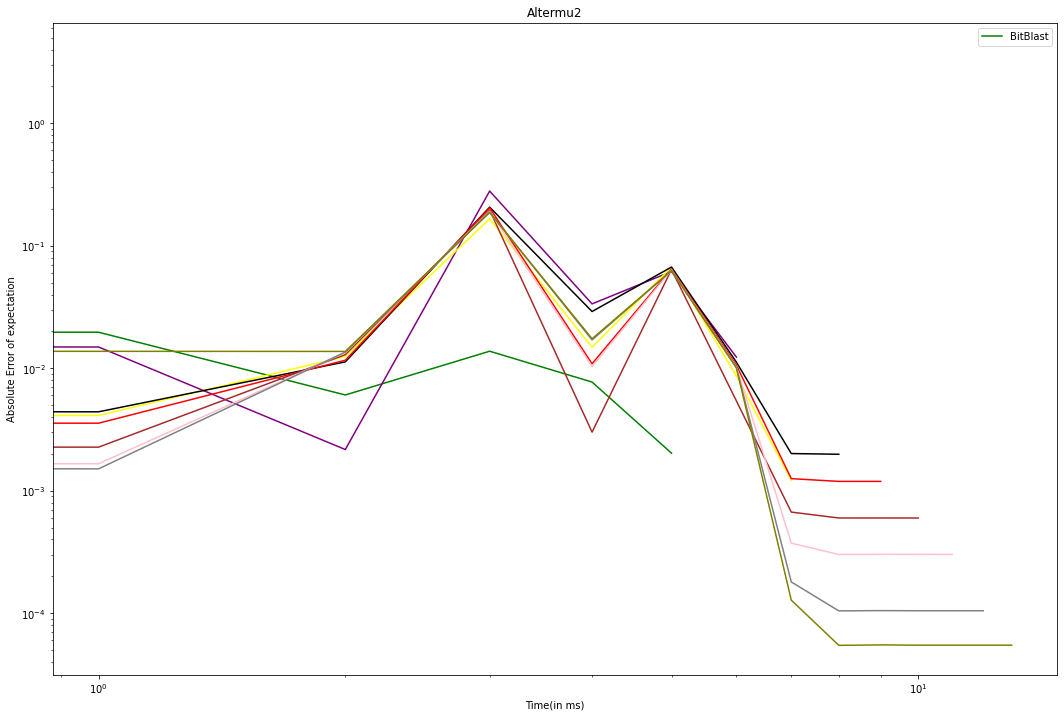

In [39]:
def plot_indiv_mean(file, gt_variance, title, no, fig1, ax1):

    a = open(file, "r")
    dice = a.readlines()

    dice = [(float(j.split(',')[1]), j) for j in dice if float(j.split(',')[0]) == no]
    dice.sort()

    dice = [j[1] for j in dice]

    t = []
    abs_err = []
    time = []


    for j in range(len(dice)):
        # print(dice[j][-2])
        if dice[j][-2] == ")":
            temp = dice[j].split(',')
            # print(temp)
            t.append((temp[0], temp[1], temp[3]))

            temp2 = abs(float(temp[4].split("(")[-1]) - gt_mean)
            abs_err.append(temp2)

            temp3 = temp[7].split('(')[-1]
            temp3 = int(temp[1])
            time.append(temp3)
        else:
            temp = dice[j].split(',')
            # print(temp)
            t.append((temp[0], temp[1], temp[3]))

            temp2 = abs(float(temp[6].split("(")[-1]) - gt_mean)
            abs_err.append(temp2)

            temp3 = temp[4].split('(')[-1]
            temp3 = int(temp[1])
            time.append(temp3)


    # for k in range(len(dice)):
    #     if time[k][-3:] == 'ms)' :
    #         time[k] = float(time[k].split(' ')[0])
    #     elif time[k][-2:] == 's)':
    #         time[k] = float(time[k].split(' ')[0]) * 1000
    #     else:
    #         time[k] = float(time[k])*1000

    ax1.plot(time, abs_err, color= colors[no])
    # for i in range(len(t)):
        # ax1.annotate(t[i], (time[i], abs_err[i]))




fig1, ax1 = plt.subplots()
ax1.set_ylabel('Absolute Error of expectation')
ax1.set_xscale("log")
ax1.set_xlabel('Time(in ms)')
ax1.set_yscale("log")
ax1.set_title("Altermu2")

fig1.set_facecolor('white')
fig1.set_size_inches(18, 12)

# Comment the following line to calculate abolute error of expectation
# gt_mean = 0.0
for no in range(1, 13):
    plot_indiv_mean("/home/poorvagarg/.julia/dev/Dice/benchmarks/altermu2_res.txt", gt_mean, "Altermu2", no, fig1, ax1)
AQUA_pt = (AQUA_time, abs(AQUA_mean - gt_mean))
# ax1.scatter(AQUA_pt[0], AQUA_pt[1], color = 'orange')
# ax1.annotate('AQUA', AQUA_pt)

ax1.legend(["BitBlast"])

# fig1.legend("")
fig1.savefig("altermu2_results_mean.png")

Altermu

3.3306690738754696e-16 1.086576279981065


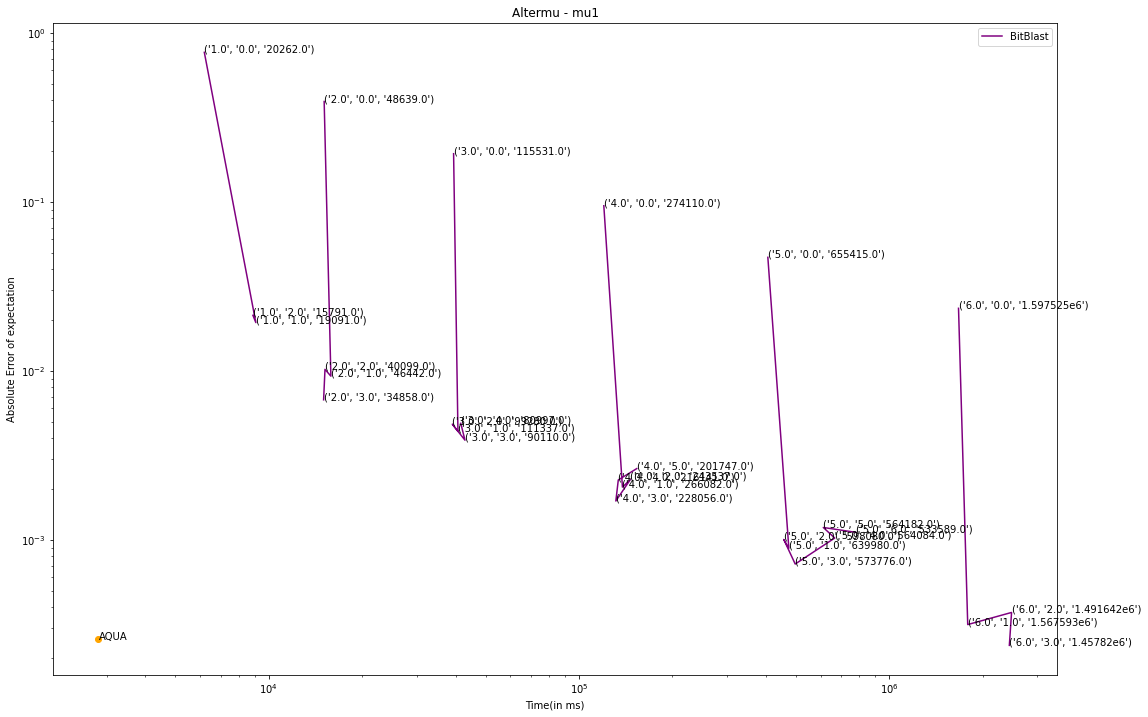

In [14]:
def plot_indiv_mean(file, gt_mean, title, no, fig1, ax1, offset):

    a = open(file, "r")
    dice = a.readlines()

    dice = [(float(j.split(',')[1]), j) for j in dice if float(j.split(',')[0]) == no]
    dice.sort()

    dice = [j[1] for j in dice]

    t = []
    abs_err = []
    time = []


    for j in range(len(dice)):
        temp = dice[j].split(',')
        t.append((temp[0], temp[1], temp[3]))

        temp2 = abs(float(temp[5 + (1 - math.ceil(offset))*2]) + (offset)*1/2**(no+1) - gt_mean)
        abs_err.append(temp2)

        temp3 = float(temp[4 + (1 - math.ceil(offset))*2]) * 1000
        time.append(temp3)

    ax1.plot(time, abs_err, color= "purple")
    for i in range(len(t)):
        ax1.annotate(t[i], (time[i], abs_err[i]))

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Absolute Error of expectation')
ax1.set_xscale("log")
ax1.set_xlabel('Time(in ms)')
ax1.set_yscale("log")
ax1.set_title("Altermu - mu1")

fig1.set_facecolor('white')
fig1.set_size_inches(18, 12)

gt_mean = 2.57737e-04
for no in range(1, 7):
    plot_indiv_mean("/home/poorvagarg/.julia/dev/Dice/benchmarks/altermu_mu1_res.txt", gt_mean, "Altermu-mu1", no, fig1, ax1, 1/4)


AQUA_mean, AQUA_variance = read_AQUA_file("/home/poorvagarg/Desktop/AQUA/benchmarks/stan_bench/altermu/analysis_mu[1].txt")

AQUA_time = ((3.065353433 + 2.585773617)/2) * 1000
AQUA_pt = (AQUA_time, abs(AQUA_mean - gt_mean))
ax1.scatter(AQUA_pt[0], AQUA_pt[1], color = 'orange')
ax1.annotate('AQUA', AQUA_pt)

ax1.legend(["BitBlast"])

fig1.savefig("altermu_mu1_results_mean.png")

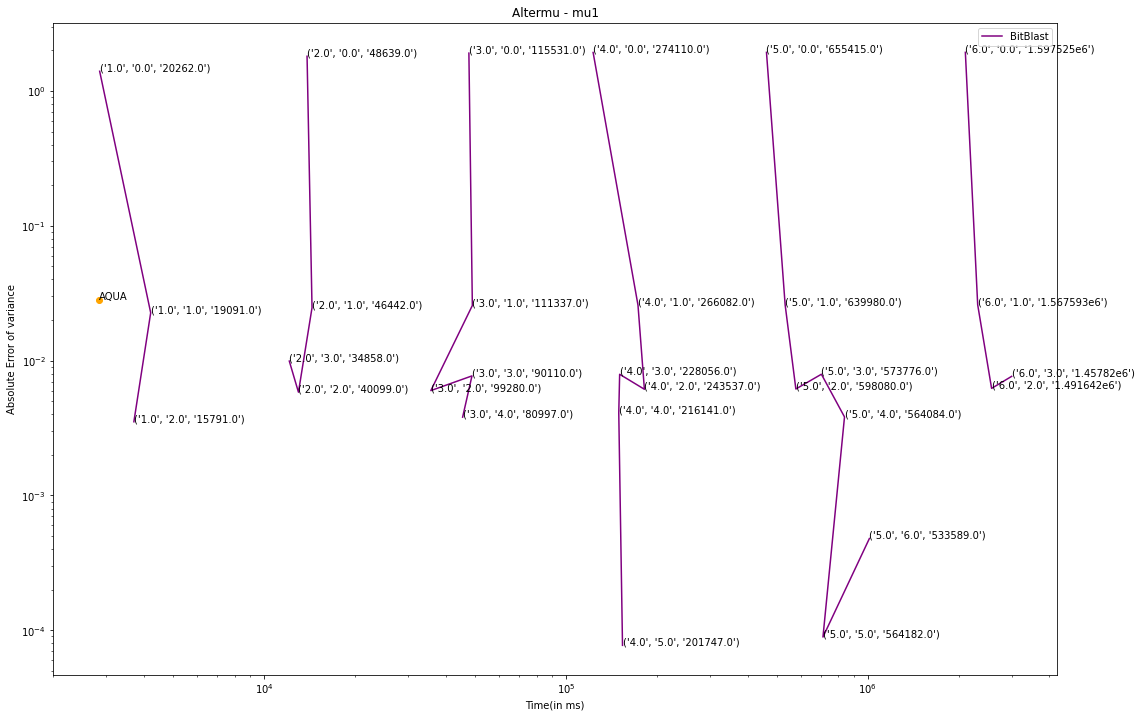

In [19]:
gt_variance = (1.02877e+00)**2

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Absolute Error of variance')
ax1.set_xscale("log")
ax1.set_xlabel('Time(in ms)')
ax1.set_yscale("log")
ax1.set_title("Altermu - mu1")

fig1.set_facecolor('white')
fig1.set_size_inches(18, 12)

gt_mean = 2.57737e-04
for no in range(1, 7):
    plot_indiv_mean("/home/poorvagarg/.julia/dev/Dice/benchmarks/altermu_mu1_res.txt", gt_variance, "Altermu-mu1", no, fig1, ax1, 0)


AQUA_time = ((3.065353433 + 2.585773617)/2) * 1000
AQUA_pt = (AQUA_time, abs(AQUA_variance - gt_variance))
ax1.scatter(AQUA_pt[0], AQUA_pt[1], color = 'orange')
ax1.annotate('AQUA', AQUA_pt)

ax1.legend(["BitBlast"])

fig1.savefig("altermu_mu1_results_variance.png")

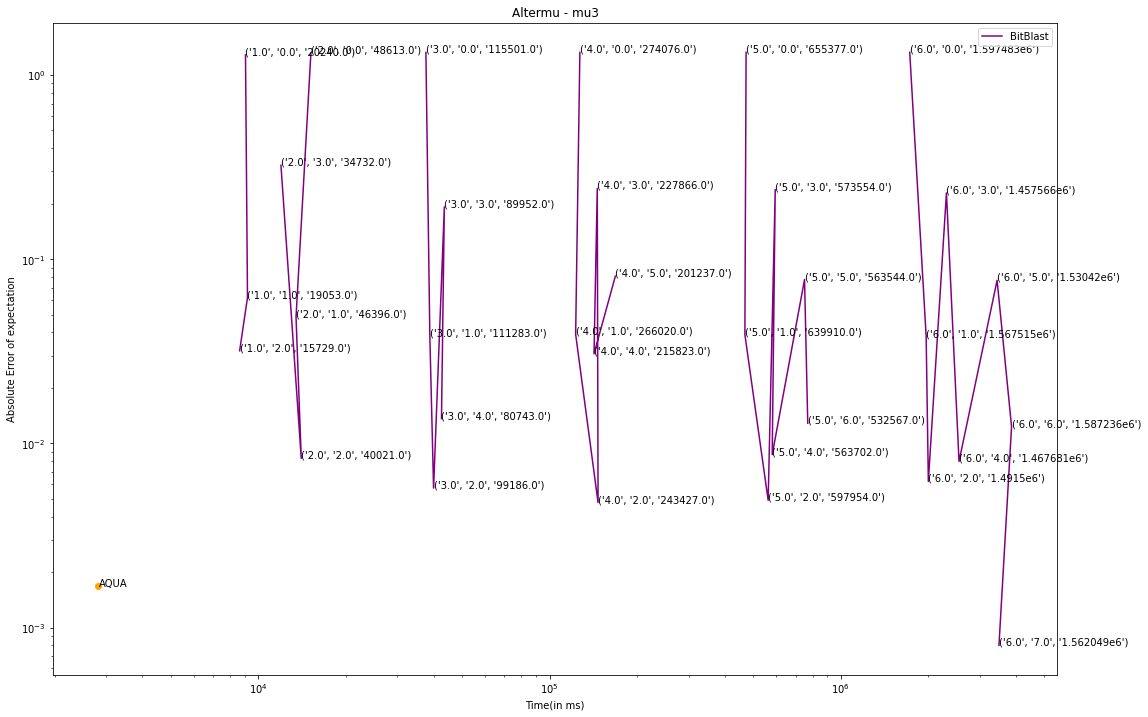

In [39]:
AQUA_mu3_mean, AQUA_mu3_variance = read_AQUA_file("/home/poorvagarg/Desktop/AQUA/benchmarks/stan_bench/altermu/analysis_mu[3].txt")

gt_mean = -1.86373e-01
gt_variance = (8.82885e-01)**2

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Absolute Error of expectation')
ax1.set_xscale("log")
ax1.set_xlabel('Time(in ms)')
ax1.set_yscale("log")
ax1.set_title("Altermu - mu3")

fig1.set_facecolor('white')
fig1.set_size_inches(18, 12)

for no in range(1, 7):
    plot_indiv_mean("/home/poorvagarg/.julia/dev/Dice/benchmarks/altermu_mu3_res.txt", gt_mean, "Altermu-mu3", no, fig1, ax1, 1)


AQUA_time = ((3.065353433 + 2.585773617)/2) * 1000
AQUA_pt = (AQUA_time, abs(AQUA_mu3_mean - gt_mean))
ax1.scatter(AQUA_pt[0], AQUA_pt[1], color = 'orange')
ax1.annotate('AQUA', AQUA_pt)

ax1.legend(["BitBlast"])

fig1.savefig("altermu_mu3_results_mean.png")

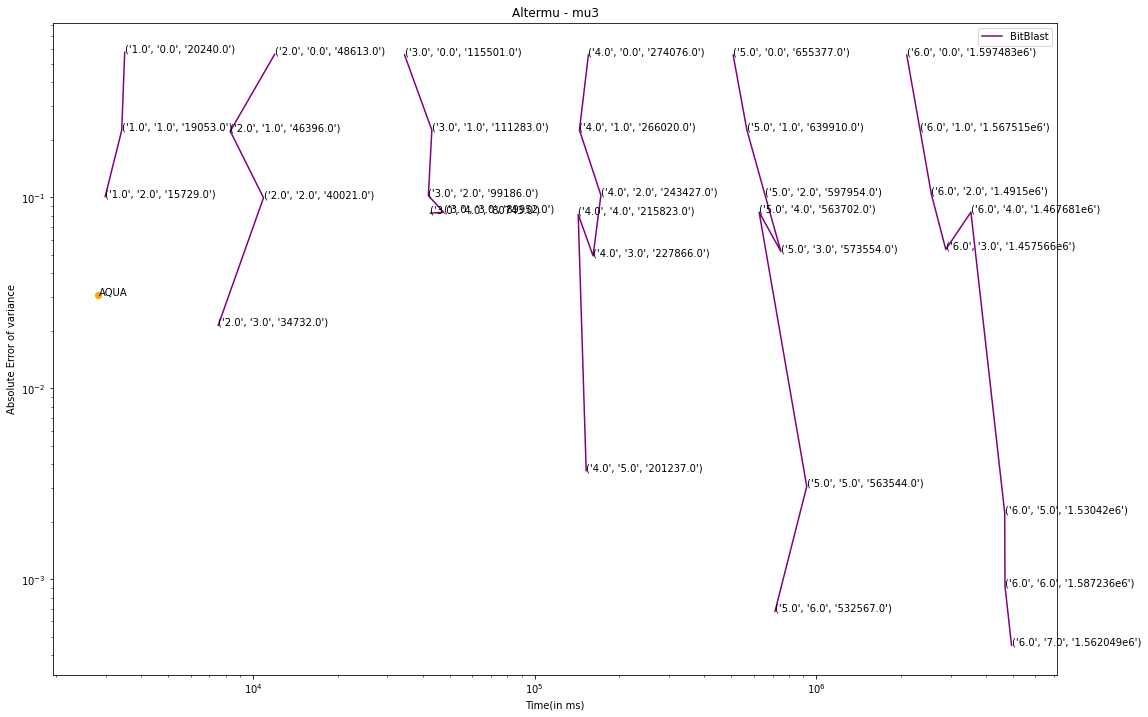

In [21]:
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Absolute Error of variance')
ax1.set_xscale("log")
ax1.set_xlabel('Time(in ms)')
ax1.set_yscale("log")
ax1.set_title("Altermu - mu3")

fig1.set_facecolor('white')
fig1.set_size_inches(18, 12)

for no in range(1, 7):
    plot_indiv_mean("/home/poorvagarg/.julia/dev/Dice/benchmarks/altermu_mu3_res.txt", gt_variance, "Altermu-mu3", no, fig1, ax1, 0)


AQUA_time = ((3.065353433 + 2.585773617)/2) * 1000
AQUA_pt = (AQUA_time, abs(AQUA_mu3_variance - gt_variance))
ax1.scatter(AQUA_pt[0], AQUA_pt[1], color = 'orange')
ax1.annotate('AQUA', AQUA_pt)

ax1.legend(["BitBlast"])

fig1.savefig("altermu_mu3_results_variance.png")

Anova Radon NoPred

In [51]:
AQUA_time = read_AQUA_time("/home/poorvagarg/Desktop/AQUA/benchmarks/stan_bench/anova_radon_nopred/runtime.txt")

AQUA_a1_mean, AQUA_a1_variance = read_AQUA_file("/home/poorvagarg/Desktop/AQUA/benchmarks/stan_bench/anova_radon_nopred/analysis_a[1].txt")
AQUA_sigmay_mean, AQUA_sigmay_variance = read_AQUA_file("/home/poorvagarg/Desktop/AQUA/benchmarks/stan_bench/anova_radon_nopred/analysis_sigma_y.txt")

gt_mean, gt_variance = gt_from_sampling("/home/poorvagarg/cmdstan-2.28.2/benchmarks/anova_radon_nopred/summary.txt", ['a[1]', 'sigma_y'])

0.945231 0.9451333857704828
0.016568323524 0.016198169214182934


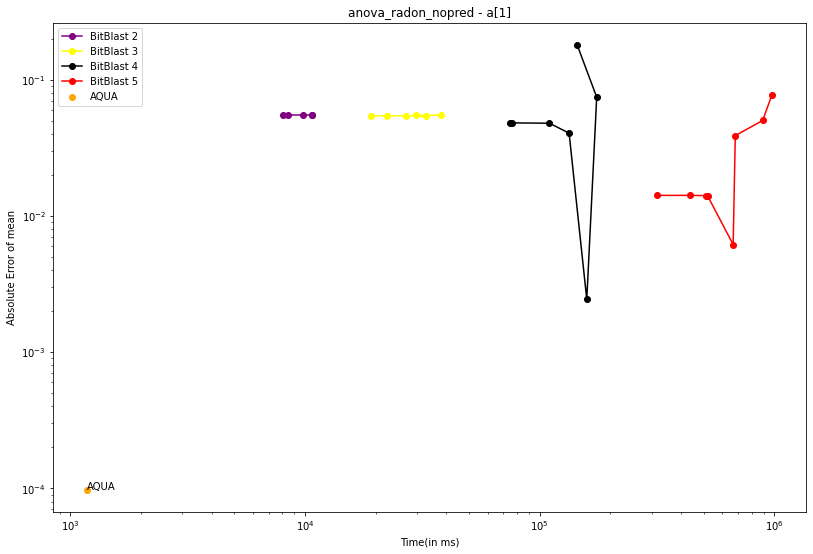

In [71]:
fig, ax = plotting_dice_data('mean', "anova_radon_nopred", "a[1]", 
                            "/home/poorvagarg/.julia/dev/Dice/benchmarks/anova_radon_nopred/a1_res.txt",
                            2, 6, 0, gt_mean['a[1]'], AQUA_time, AQUA_a1_mean, False, 's')

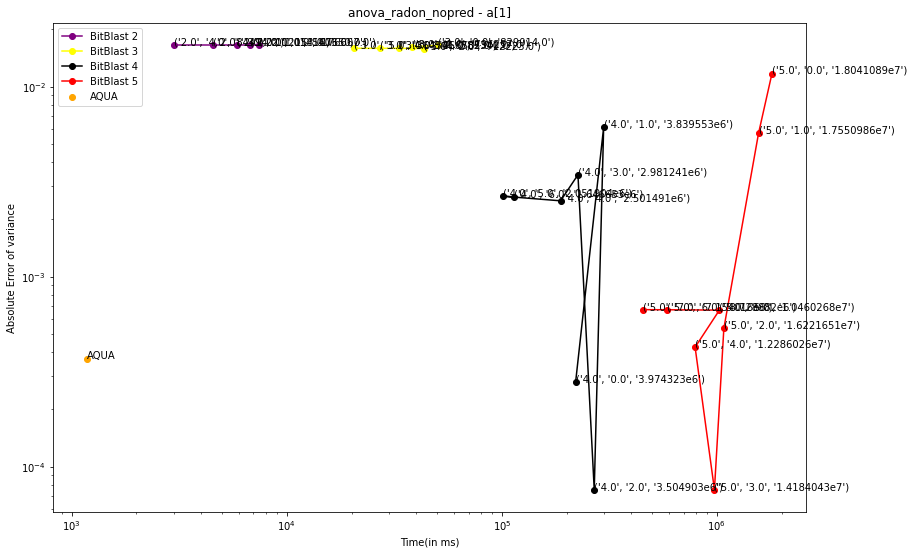

In [73]:
fig, ax = plotting_dice_data('variance', "anova_radon_nopred", "a[1]", 
                            "/home/poorvagarg/.julia/dev/Dice/benchmarks/anova_radon_nopred/a1_res.txt",
                            2, 6, 0, gt_variance['a[1]'], AQUA_time, AQUA_a1_variance, True, 's')

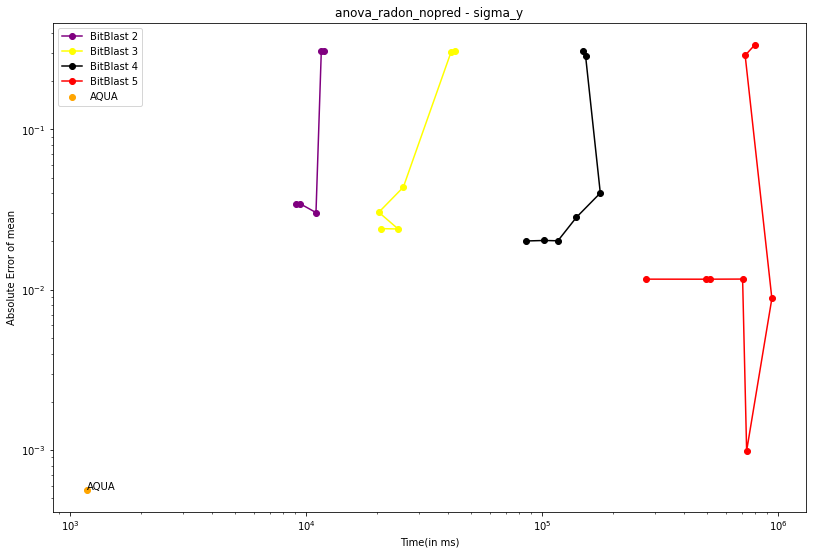

In [74]:
fig, ax = plotting_dice_data('mean', "anova_radon_nopred", "sigma_y", 
                            "/home/poorvagarg/.julia/dev/Dice/benchmarks/anova_radon_nopred/sigmay_res.txt",
                            2, 6, 0, gt_mean['sigma_y'], AQUA_time, AQUA_sigmay_mean, False, 's')

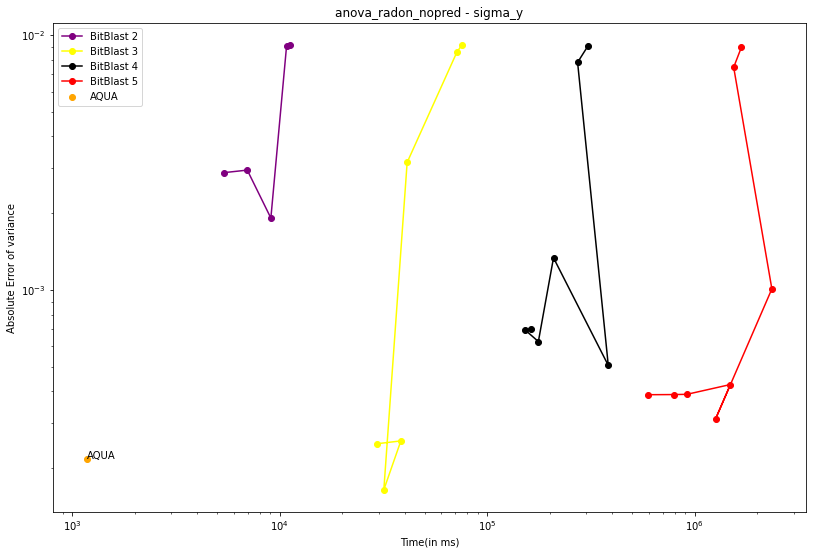

In [75]:
fig, ax = plotting_dice_data('variance', "anova_radon_nopred", "sigma_y", 
                            "/home/poorvagarg/.julia/dev/Dice/benchmarks/anova_radon_nopred/sigmay_res.txt",
                            2, 6, 0, gt_variance['sigma_y'], AQUA_time, AQUA_sigmay_variance, False, 's')

Gamma Transform

In [78]:
AQUA_mean, AQUA_variance = read_AQUA_file("/home/poorvagarg/Desktop/AQUA/benchmarks/storm_bench/gammaTransform/analysis_X.txt")

gt_mean, gt_variance = gamma.stats(3, scale = 1)

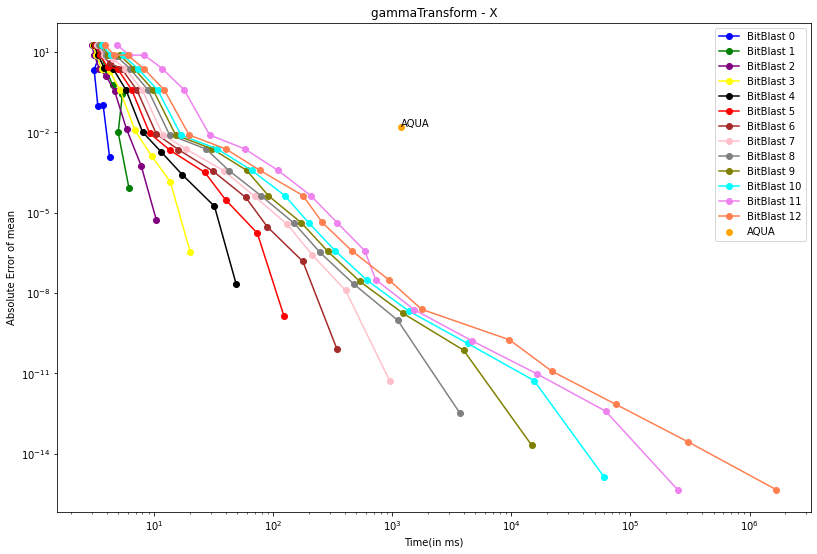

In [89]:
fig, ax = plotting_dice_data('mean', "gammaTransform", "X", 
                            "/home/poorvagarg/.julia/dev/Dice/benchmarks/gammaTransform/gammaTransform_res.txt",
                            0, 13, 1/2, gt_mean, AQUA_time, AQUA_mean, False, 'ms')

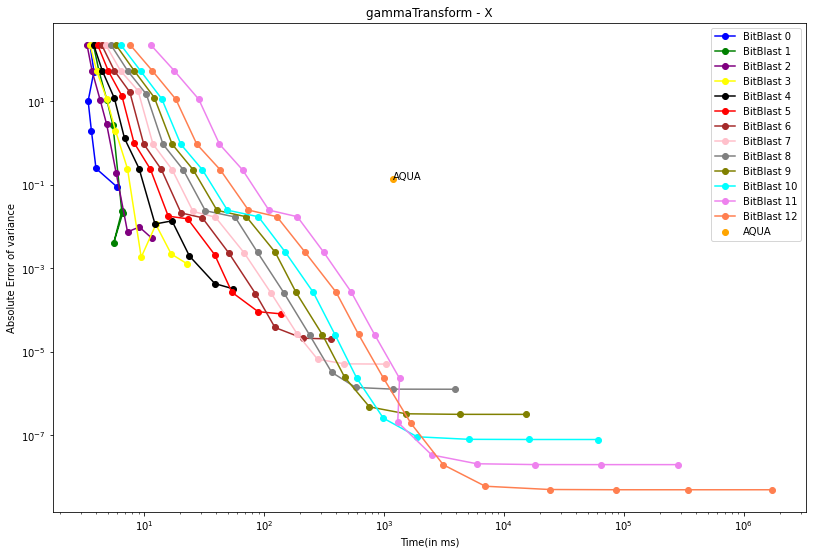

In [90]:
fig, ax = plotting_dice_data('variance', "gammaTransform", "X", 
                            "/home/poorvagarg/.julia/dev/Dice/benchmarks/gammaTransform/gammaTransform_res.txt",
                            0, 13, 0, gt_variance, AQUA_time, AQUA_variance, False, 'ms')